In [1]:
# from google.colab import drive
# drive.mount('/content/drive/')

from IPython.display import display, HTML
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns
import plotly.graph_objects as go


import zipfile
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Define HTML content
html_content = """
<div style="background-color: #3498db; height: 100px; width: 100%; position: relative; display: flex; align-items: center;">
  <div style="color: white; width: 100%; text-align: center;">
    <h2>Project Agenda</h2>
    <div style="display: flex; justify-content: space-around; color: white;">
    </div>
  </div>
</div>
"""

# Display HTML content
HTML(html_content)

*  Introduction
*  Exploratory Data Analysis
*  Data Pre-Processing
*  Data Visualization
*  Model Training
*  Model Evaluation
*  Conclusion

In [3]:
# Define HTML content
html_content = """
<div style="background-color: #3498db; height: 100px; width: 100%; position: relative; display: flex; align-items: center;">
  <div style="color: white; width: 100%; text-align: center;">
    <h2>Introduction</h2>
    <div style="display: flex; justify-content: space-around; color: white;">
      <p style="flex-grow: 1;">The hotel industry is currently facing a number of challenges, such as reduced revenue from high cancellation rates and underutilization of hotel rooms. This report focuses on analyzing hotel booking cancellation rates and other factors that affect its revenue.</p>
    </div>
  </div>
</div>
"""

# Display HTML content
HTML(html_content)

# Introduction

## Load Dataset

In [4]:
# Specify the path to zip file
# zip_file_path = "/content/drive/MyDrive/Colab Notebooks/data/hotel_bookings.csv.zip"
zip_file_path = "data/hotel_bookings.csv.zip"

# Extract the CSV file from the zip
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Assuming there's only one file in the zip, you can use the first one
    csv_file_name = zip_ref.namelist()[0]
    zip_ref.extract(csv_file_name)

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_name)

In [5]:
# Define HTML content
html_content = """
<div style="background-color: #3498db; height: 100px; width: 100%; position: relative; display: flex; align-items: center;">
  <div style="color: white; width: 100%; text-align: center;">
    <h2>Data Description</h2>
    <div style="display: flex; justify-content: space-around; color: white;">
      <p style="flex-grow: 1;">This dataset contains 119,390 observations for the City Hotel and the Resort Hotel.
      Each observation(row) represents a hotel booking between the 2015/07/01 and 2017/08/31, including booking that effectively arrived and booking that were canceled.</p>
    </div>
  </div>
</div>
"""

# Display HTML content
HTML(html_content)

## Data Description

Columns:

**hotel**: One of the hotels is a resort hotel and the other is a city hotel.

**is_canceled**: Value indicating if the booking was canceled (1) or not (0).

**lead time**: Number of days that elapsed between the entering date of the booking into the PMS and the arrival date

**arrival_date_year**: Year of arrival date.

**arrival_date_month**: Month of arrival date with 12 categories: “January” to “December”.

**arrival_date_week_number**: Week number of the arrival date.

**arrival_date_day_of_month**: Day of the month of the arrival date.

**stays_in_weekend_nights**: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel.

**stays_in_week_nights**: Number of week nights (Monday to Friday) the guest stayed.

**adults**: Number of adults

**children**: Number of Childern

**babies**: Number of Babies

**meal**: Type of meal booked. Categories are presented in standard hospitality meal packages: Undefined/SC – no meal, BB – Bed & Breakfast

**country**: Country of origin.

**market_segment**: Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”

**distribution_channel**: Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”

**is_repeated_guest**: Value indicating if the booking name was from a repeated guest (1) or not (0)

**previous_cancellations**: Number of previous bookings that were cancelled by the customer prior to the current booking

**previous_bookings_not_canceled**: Number of previous bookings not cancelled by the customer prior to the current booking

**reserved_room_type**: Code of room type reserved. Code is presented instead of designation for anonymity reasons.

**assigned_room_type**: Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons

**booking_changes**: Number of changes/amendments made to the booking.

**deposit_type**: No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay.

**agent**: ID of the travel agency that made the booking

**company**: ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons

**days_in_waiting_list**: Number of days the booking was in the waiting list before it was confirmed to the customer

**customer_type**: Group – when the booking is associated to a group; Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; Transient-party – when the booking is transient, but is associated to at least other transient booking

**adr**: Average Daily Rate (Calculated by dividing the sum of all lodging transactions by the total number of staying nights)

**required_car_parking_spaces**: Number of car parking spaces required by the customer

**total_of_special_requests**: Number of special requests made by the customer (e.g. twin bed or high floor)

**reservation_status**: Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did inform the hotel of the reason why

**reservation_status_date**: Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel

In [6]:
display(df.head())
display(df.info())

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

None

In [7]:
date_range = (df['reservation_status_date'].min(), df['reservation_status_date'].max())

print("Date Range:", date_range)

Date Range: ('2014-10-17', '2017-09-14')


In [8]:
# Define HTML content
html_content = """
<div style="background-color: #3498db; height: 100px; width: 100%; display: flex; align-items: center;">
  <div style="color: white; width: 100%; text-align: center;">
    <h2>Problem Specification</h2>
  </div>
</div>
"""

# Display HTML content
HTML(html_content)

## Problem Specification

1.  Factors influencing hotel reservation cancellations
2.  Improving hotel reservation cancellation management
3.  Supporting all hotels in pricing and promotional strategies

In [9]:
# Define HTML content
html_content = """
<div style="background-color: #3498db; height: 100px; width: 100%; position: relative; display: flex; align-items: center;">
  <div style="color: white; width: 100%; text-align: center;">
    <h2>Exploratory Data Analysis</h2>
    <div style="display: flex; justify-content: space-around; color: white;">
    </div>
  </div>
</div>
"""

# Display HTML content
HTML(html_content)

# Exploratory Data Analysis

1.  Check Data types
2.  Check Missing values
3.  Check Duplicates
4.  Check the number of unique values of each column
5.  Check statistics of the dataset
6.  Check various categories present in the different categorical columns

## Check Data types

In [10]:
df['reservation_status_date']= pd.to_datetime(df['reservation_status_date'])
# Check data types of each column
data_types = df.dtypes
print("Data Types:\n", data_types)

Data Types:
 hotel                                     object
is_canceled                                int64
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                        object
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                 float64
babies                                     int64
meal                                      object
country                                   object
market_segment                            object
distribution_channel                      object
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                        object
assigne

## Check Missing values

In [11]:
# Check for missing values
missing_values = df.isnull().sum()
# Calculate missing value percentage
missing_percentage = round((missing_values / len(df)) * 100,2)
# Combine missing values and missing percentages into a DataFrame
missing_info = pd.DataFrame({'Missing Values': missing_values, 'Missing Percentage': missing_percentage})
print("Missing Values:\n", missing_info)

Missing Values:
                                 Missing Values  Missing Percentage
hotel                                        0                0.00
is_canceled                                  0                0.00
lead_time                                    0                0.00
arrival_date_year                            0                0.00
arrival_date_month                           0                0.00
arrival_date_week_number                     0                0.00
arrival_date_day_of_month                    0                0.00
stays_in_weekend_nights                      0                0.00
stays_in_week_nights                         0                0.00
adults                                       0                0.00
children                                     4                0.00
babies                                       0                0.00
meal                                         0                0.00
country                                    48

## Check Duplicates

In [12]:
# Check for duplicates
duplicates = df.duplicated().sum()
print("Number of Duplicates:", duplicates)

Number of Duplicates: 31994


## Check the number of unique values of each column

In [13]:
# Check number of unique values of each column
unique_values = df.nunique()
print("Number of Unique Values:\n", unique_values)

Number of Unique Values:
 hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            177
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              333
company                            352

## Check statistics of the dataset

In [14]:
# Check statistics of the dataset
statistics = df.describe()
print("Statistics of the Dataset:\n", statistics)

Statistics of the Dataset:
          is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   
std         0.482918     106.863097           0.707476   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000                  23.000000   
max            

In [15]:
df.describe(include = 'object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


## Check various categories present in the different categorical columns

In [16]:
# Check various categories present in categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    categories = df[column].unique()
    print("Categories in", column, ":", categories)

Categories in hotel : ['Resort Hotel' 'City Hotel']
Categories in arrival_date_month : ['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
Categories in meal : ['BB' 'FB' 'HB' 'SC' 'Undefined']
Categories in country : ['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI'
 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 

In [17]:
# Define HTML content
html_content = """
<div style="background-color: #3498db; height: 100px; width: 100%; position: relative; display: flex; align-items: center;">
  <div style="color: white; width: 100%; text-align: center;">
    <h2>Data Pre-Processing</h2>
    <div style="display: flex; justify-content: space-around; color: white;">
    </div>
  </div>
</div>
"""

# Display HTML content
HTML(html_content)

# Data Pre-Processing

## Handling Missing Values

In [18]:
df.drop(['company','agent'], axis =1, inplace = True)
df.dropna(inplace =True)
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

## Drop duplicates

In [19]:
#remove repeated rows
df.drop_duplicates(inplace=True)
# check that removing is done
df.duplicated().sum()

0

In [20]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,86914.000000,86914.000000,86914.000000,86914.000000,86914.000000,86914.000000,86914.000000,86914.000000,86914.000000,86914.000000,86914.000000,86914.000000,86914.000000,86914.000000,86914.000000,86914.000000,86914.000000,86914.000000,86914
mean,0.275939,80.202741,2016.211842,26.841694,15.818453,1.007548,2.628955,1.878604,0.139253,0.010815,0.039246,0.030237,0.176761,0.271912,0.753722,106.580816,0.083473,0.699542,2016-08-31 15:53:48.543157760
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,12.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,72.250000,0.000000,0.000000,2016-03-19 00:00:00
50%,0.000000,50.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,98.410000,0.000000,0.000000,2016-09-08 00:00:00
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,134.100000,0.000000,1.000000,2017-03-06 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.446989,86.102902,0.685989,13.654113,8.834539,1.028821,2.043860,0.625881,0.456848,0.113510,0.194180,0.369629,1.718139,0.728177,10.043309,54.959600,0.280440,0.831880,NaN


In [21]:
# Define HTML content
html_content = """
<div style="background-color: #3498db; height: 100px; width: 100%; display: flex; align-items: center;">
  <div style="color: white; width: 100%; text-align: center;">
    <h2>Data Visualization</h2>
  </div>
</div>
"""

# Display HTML content
HTML(html_content)

# Data Visualization

## Check Categorical variables

In [22]:
categorical_columns = [col for col in df.select_dtypes(include=['object']).columns 
                       if col not in ['country']] + ['is_repeated_guest', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month']

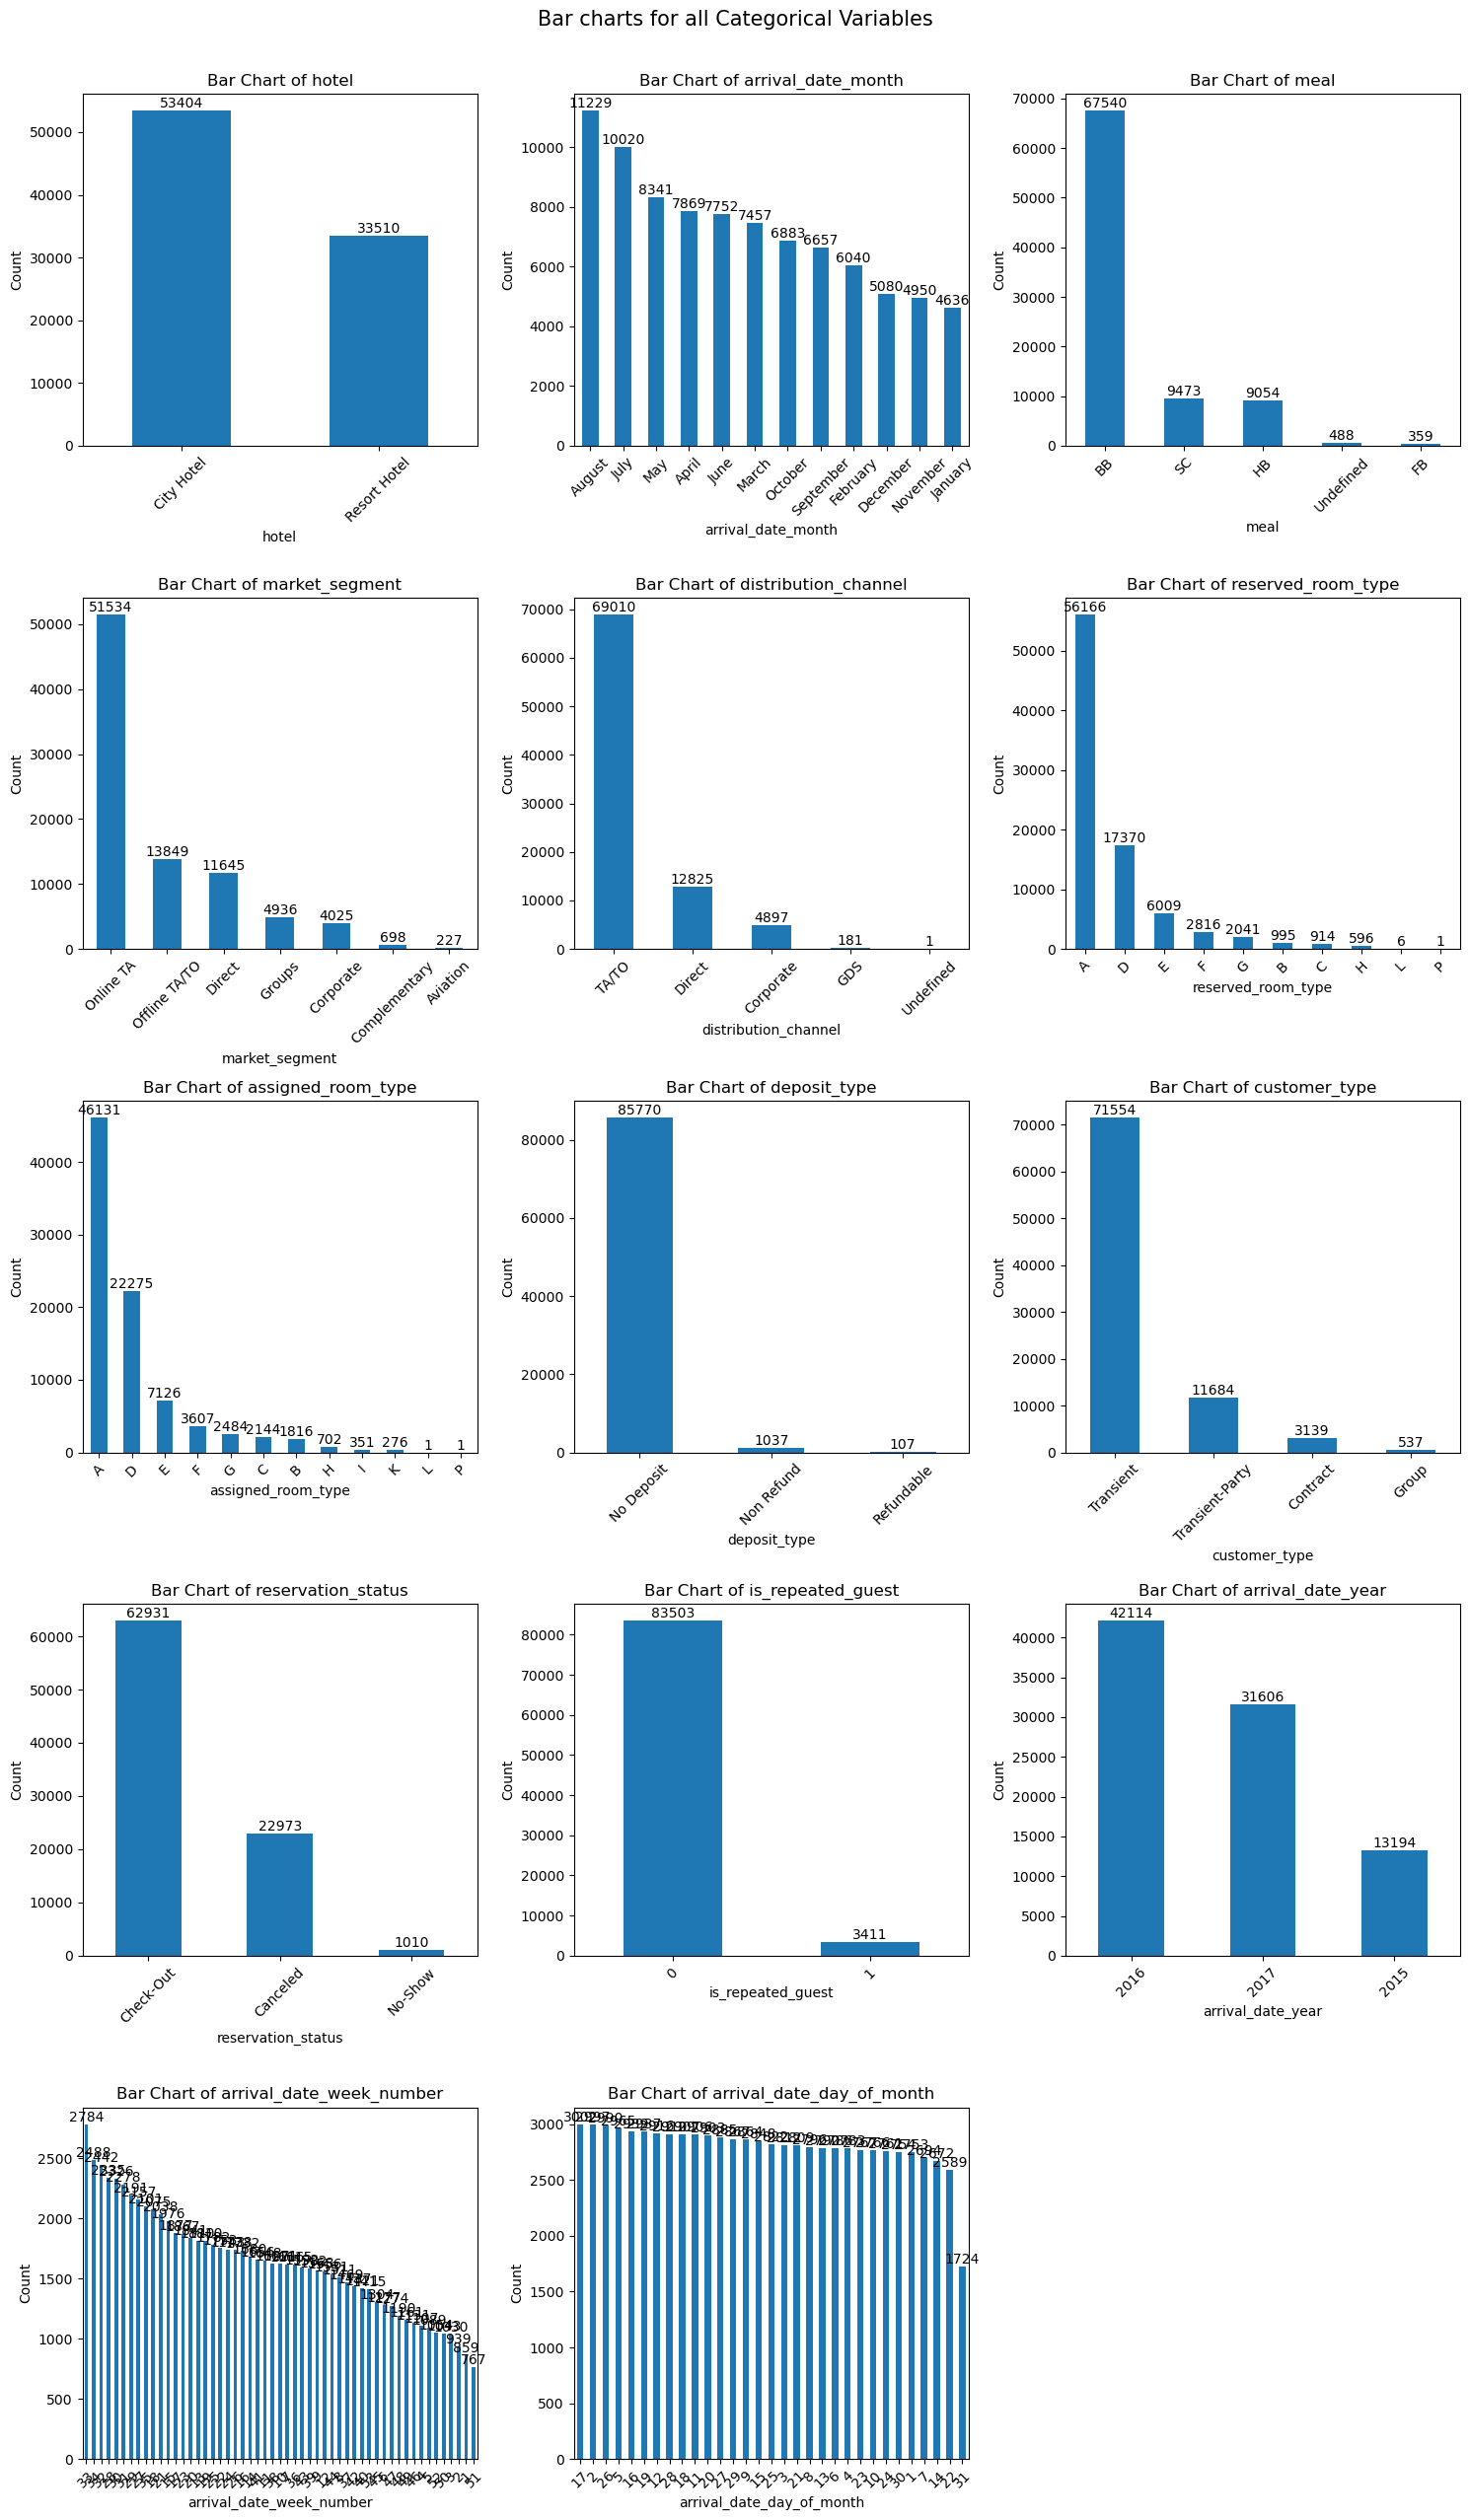

In [23]:
num_columns = len(categorical_columns)
num_rows = (num_columns + 2) // 3
num_cols = min(3, num_columns)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows), squeeze=False)

for i, column in enumerate(categorical_columns):
    ax = axes[i // num_cols, i % num_cols]

    count = df[column].value_counts()
    count.plot(kind="bar", ax=ax, rot=45)
    ax.set_title(f"Bar Chart of {column}")
    ax.set_xlabel(column)
    ax.set_ylabel("Count")

    for j, count_value in enumerate(count):
        ax.annotate(count_value, xy=(j, count_value), ha="center", va="bottom")

# Remove any extra empty subplots
for j in range(num_columns, num_rows * num_cols):
    fig.delaxes(axes.flatten()[j])

fig.tight_layout()
plt.suptitle(
    "Bar charts for all Categorical Variables",
    fontsize=15,
    y=1.02,
)
plt.show()

### Check Canceled rate and counts in total

is_canceled
0    62931
1    23983
Name: count, dtype: int64 is_canceled
0    0.724061
1    0.275939
Name: proportion, dtype: float64


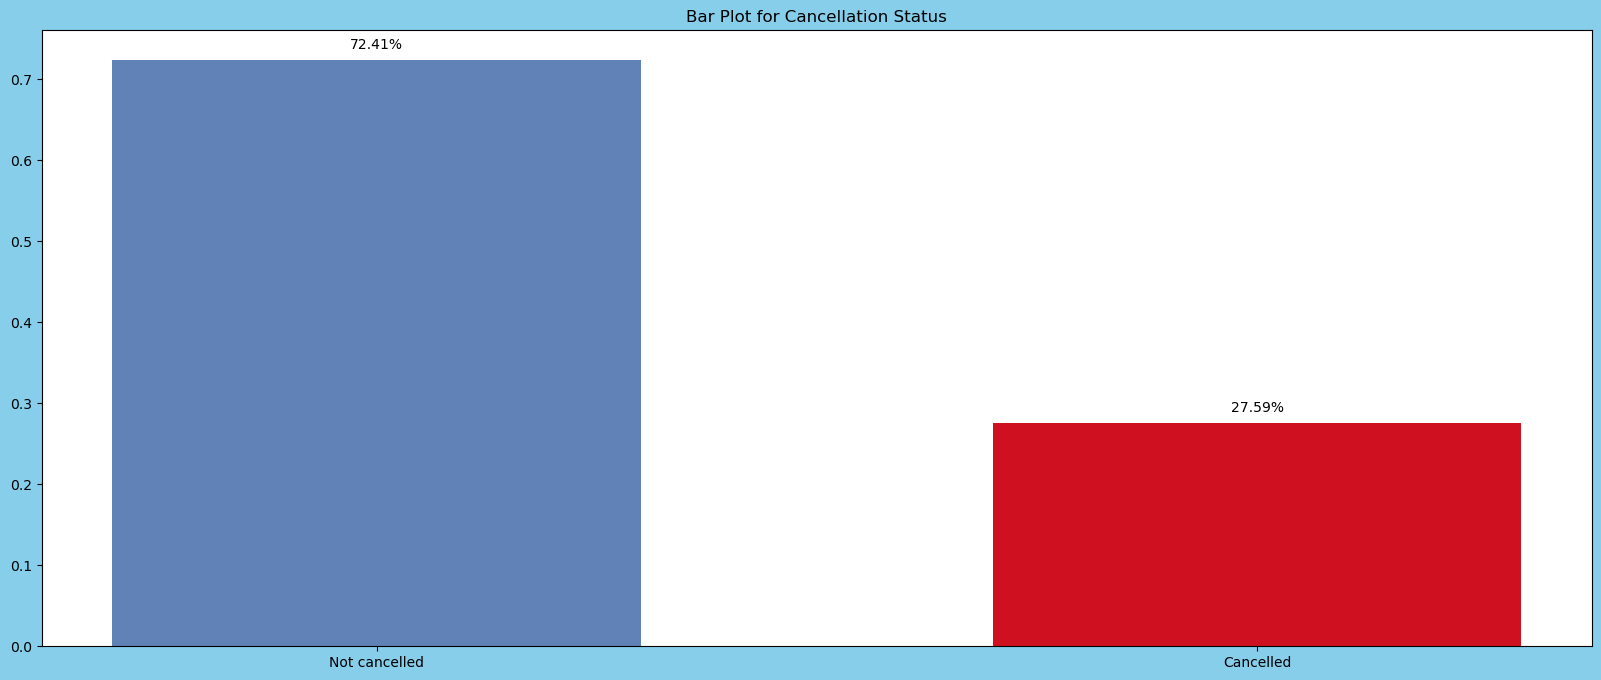

In [24]:
cancelled_cnts = df['is_canceled'].value_counts()
cancelled_perc = df['is_canceled'].value_counts(normalize=True)
print(cancelled_cnts, cancelled_perc)
colors = ['#6082b6', '#cf1020'] 

plt.figure(figsize=(20, 8), facecolor="#87ceeb")
plt.title('Bar Plot for Cancellation Status')
bars = plt.bar(['Not cancelled', 'Cancelled'], cancelled_perc, width=0.6, color=colors)

# Add value on top of each bar
for bar, perc in zip(bars, cancelled_perc):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, 
             f"{perc:.2%}", ha='center', va='bottom')

plt.show()

### Check the Cancellation Status in Top 10 countries

In [25]:
# Find the top 10 countries
top_countries = df['country'].value_counts().head(10).index

# Create a new column 'country_new' where all countries not in the top 10 are replaced with 'Others'
df['country_new'] = df['country'].apply(lambda x: x if x in top_countries else 'Others')

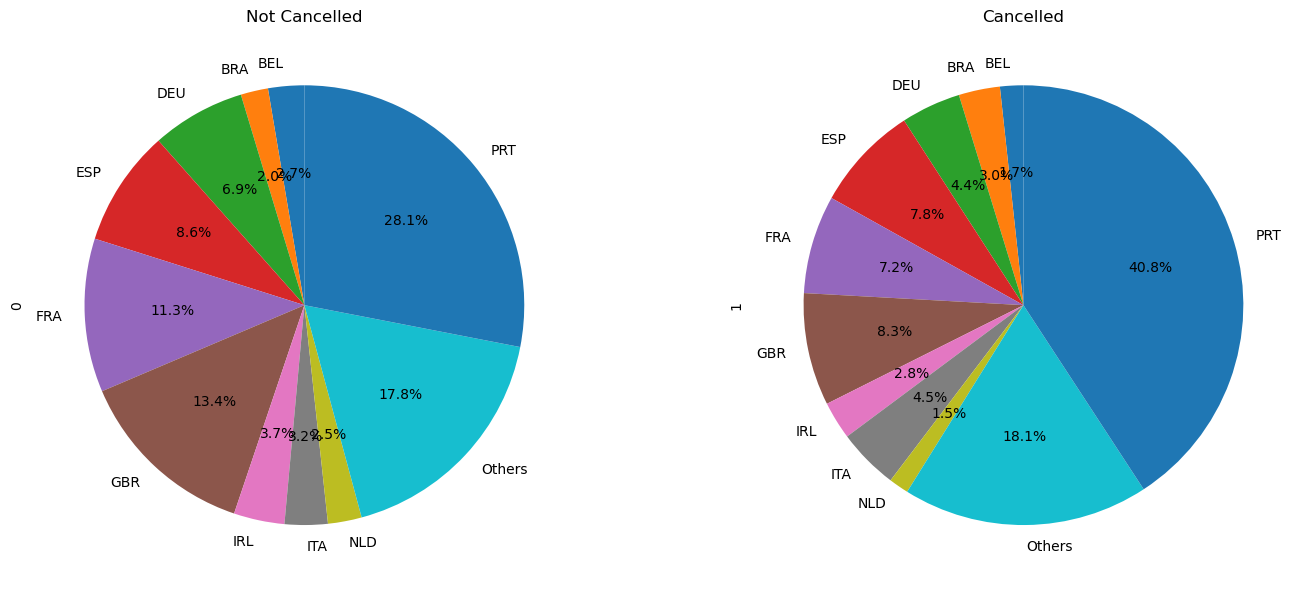

In [26]:
# Group by reservation status and country, count the number of reservations
grouped = df.groupby(['is_canceled', 'country_new']).size().unstack(fill_value=0)

# Plot pie charts for each reservation status
fig, axes = plt.subplots(1, len(grouped), figsize=(15, 6))

for ax, (status, data) in zip(axes, grouped.iterrows()):
    if status == 0:
        ax.set_title('Not Cancelled')
    else:
        ax.set_title('Cancelled')
        
    data.plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=90)

plt.tight_layout()
plt.show()

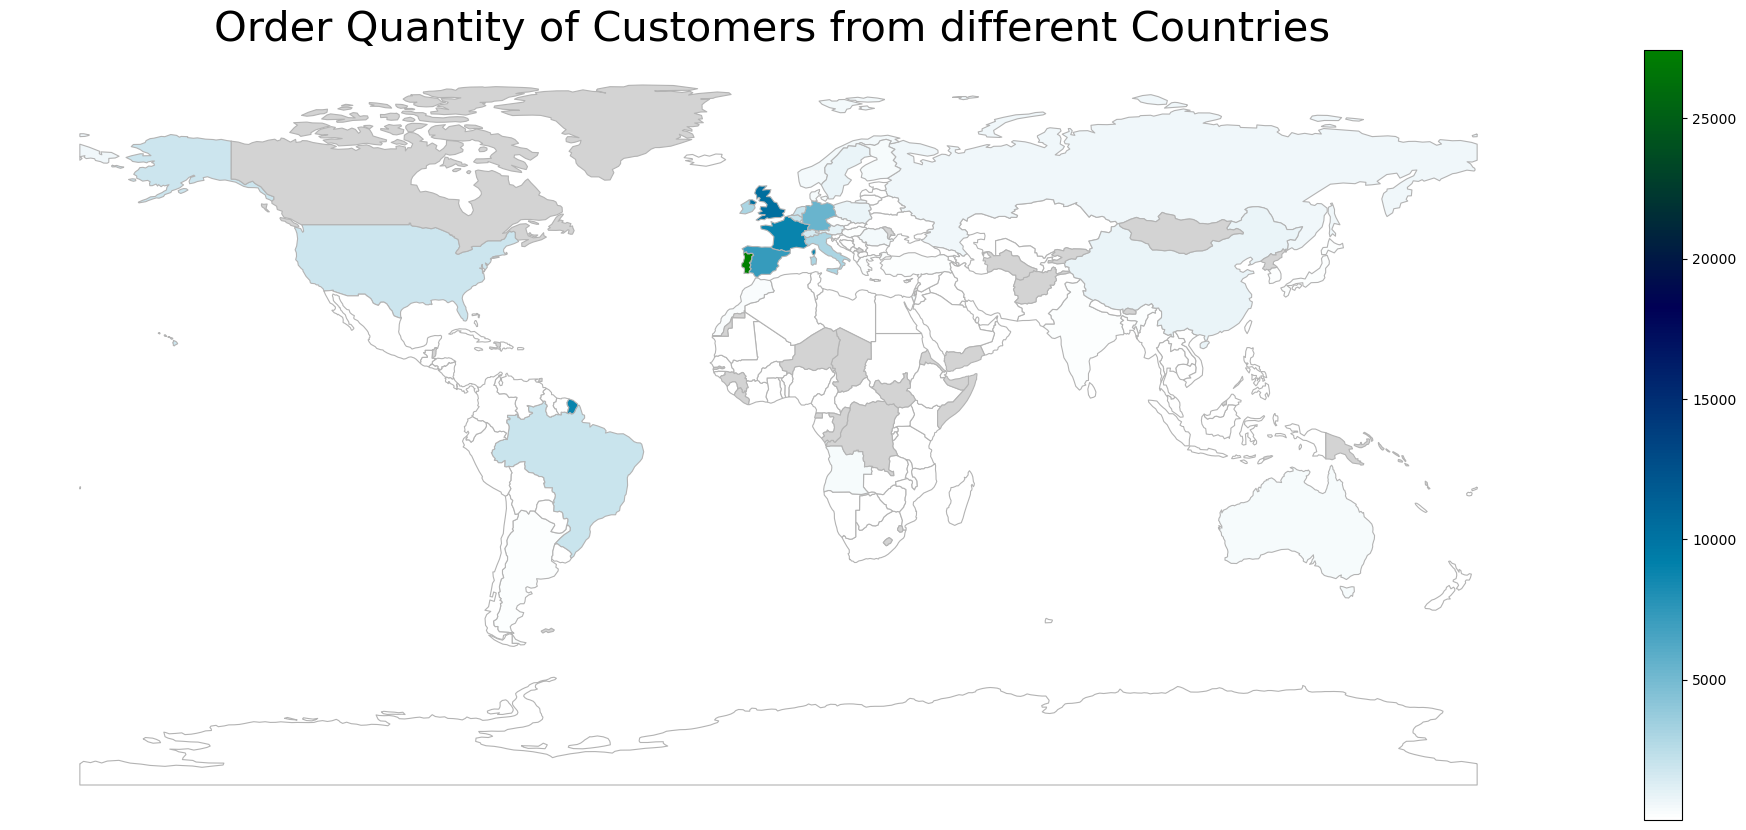

In [27]:
import geopandas
world = geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))
df_country = df["country"].value_counts().reset_index()
df_country.head(20)
df_country = world.merge(df_country, how="left", left_on=["iso_a3"], right_on=["country"])
df_country.head()
fig, ax = plt.subplots(1, figsize=(25,10))
df_country.plot(column="count", cmap="ocean_r", linewidth=0.8, ax=ax, edgecolors="0.7",legend=True,\
                missing_kwds={"color": "lightgrey"})
ax.set_title("Order Quantity of Customers from different Countries ", fontdict={"fontsize":30})
ax.set_axis_off()

### Check pairs between each categorical variables and is_canceled

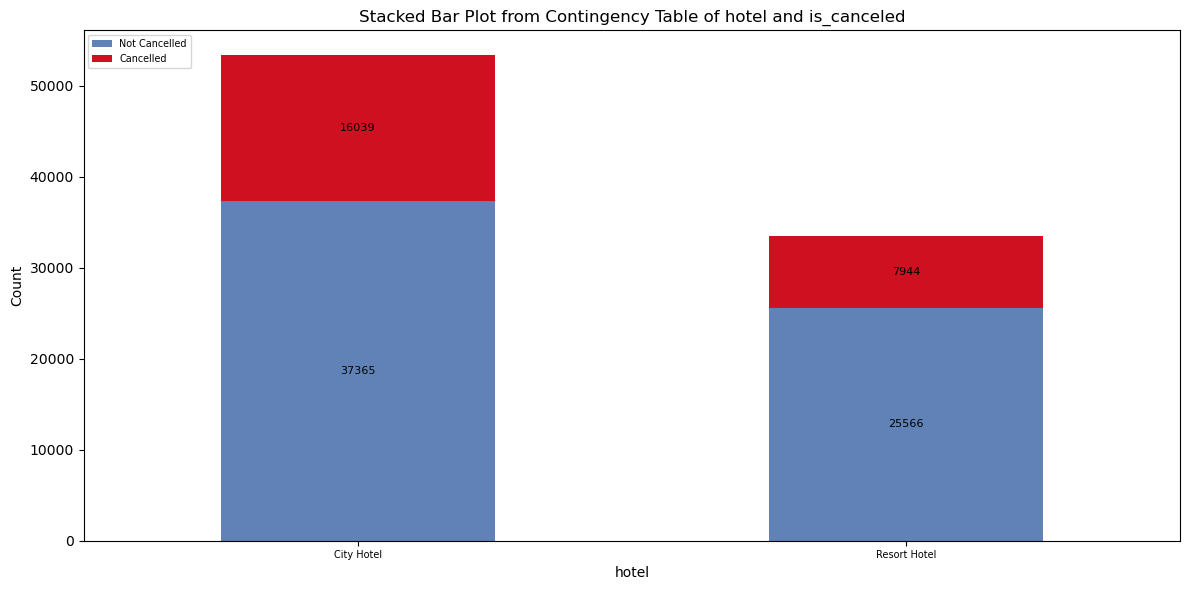

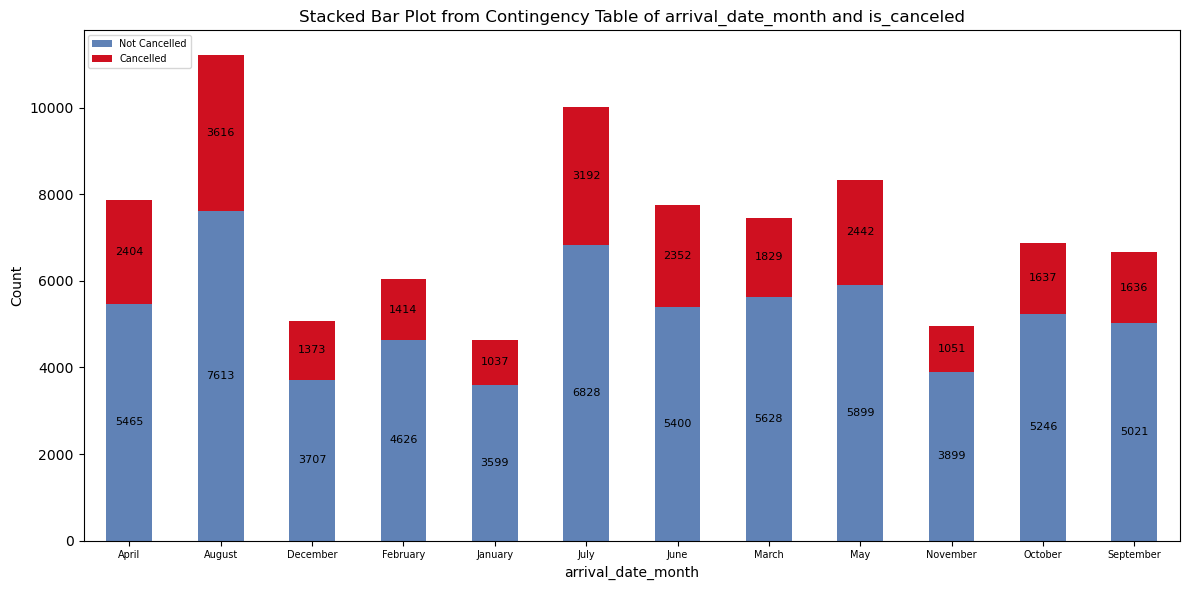

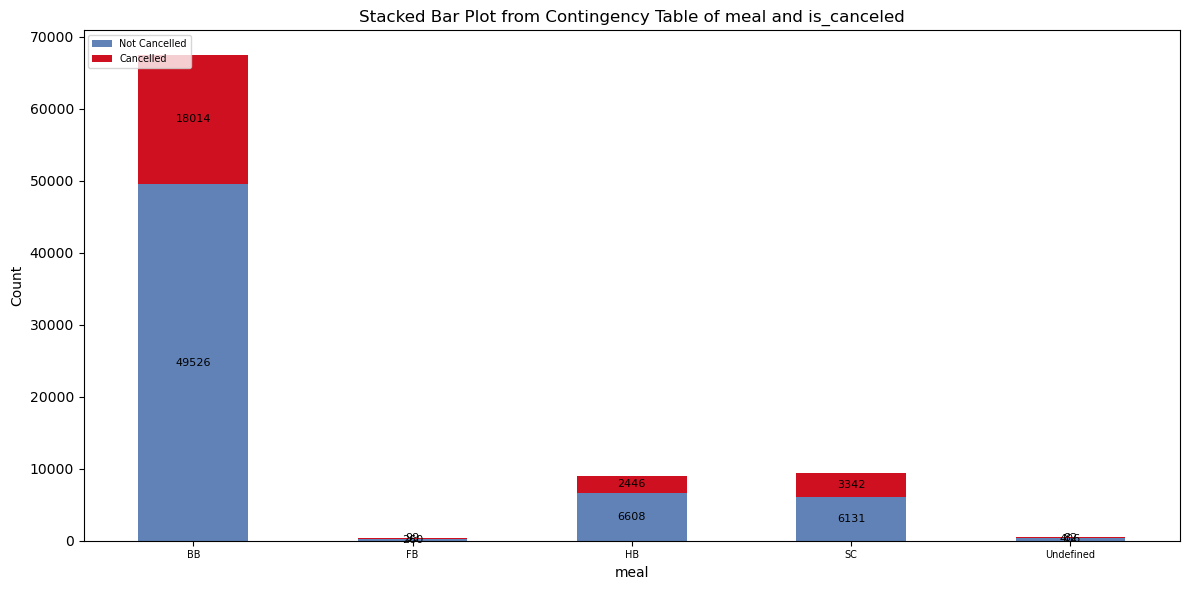

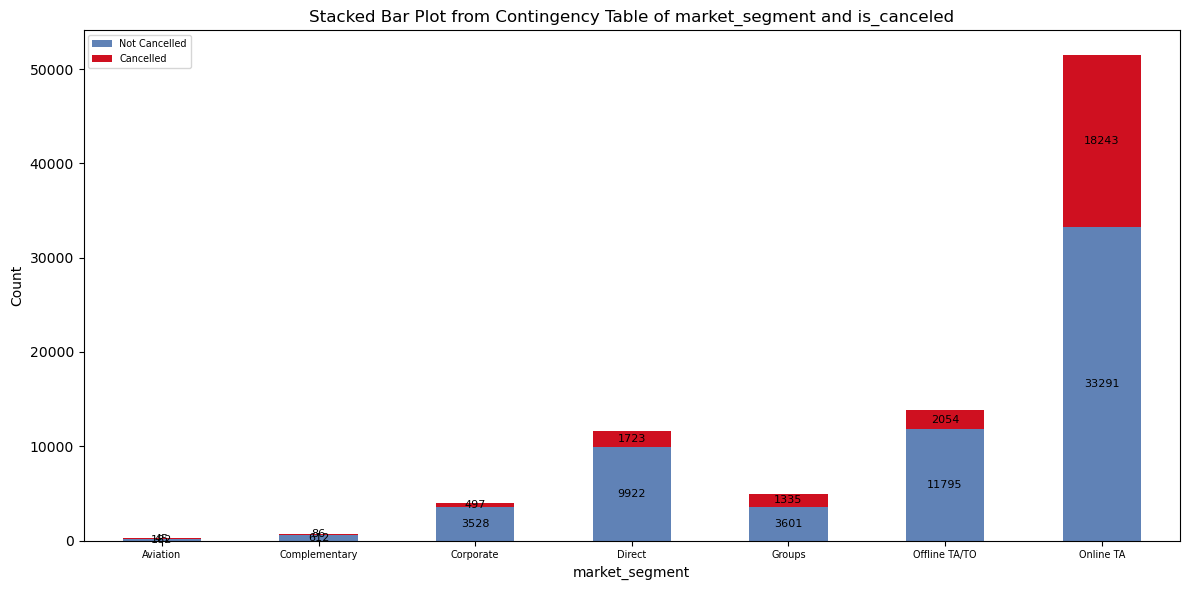

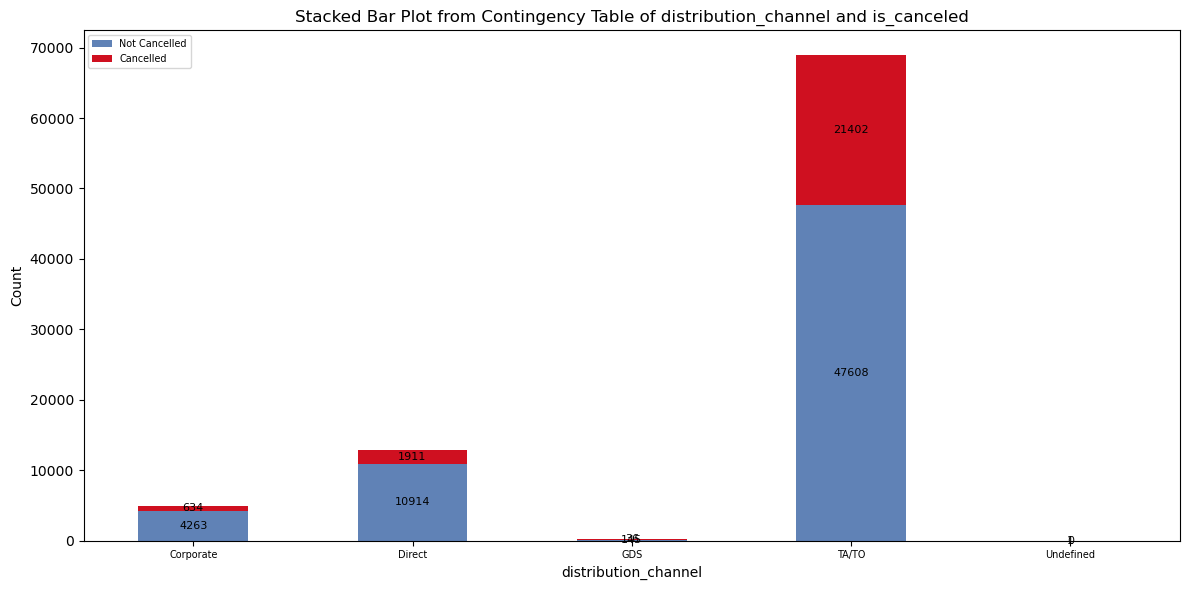

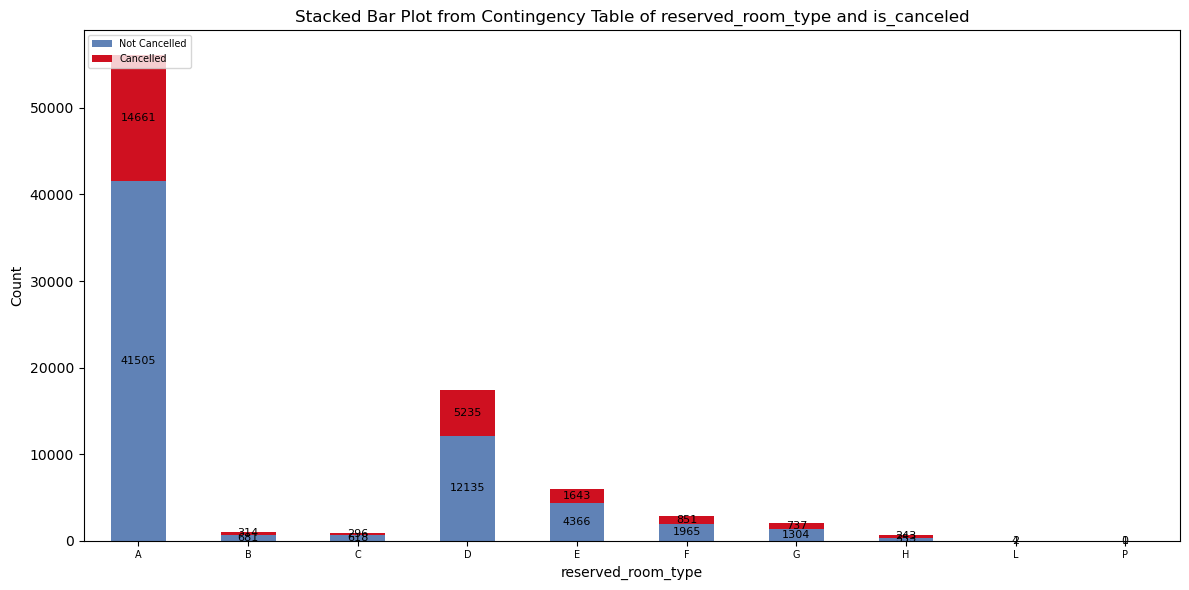

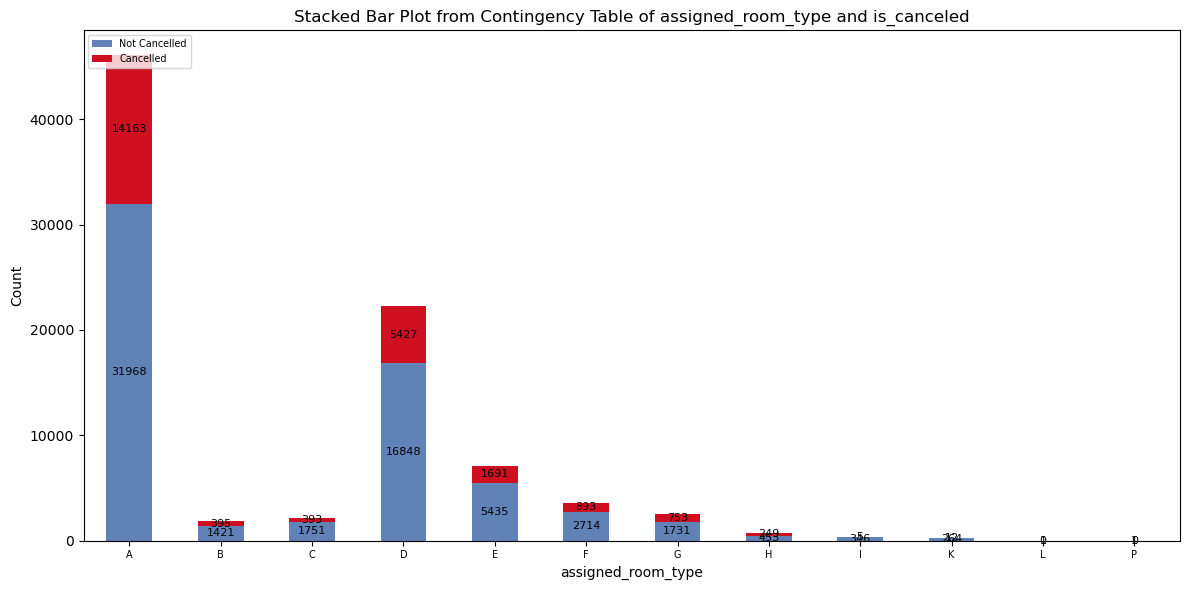

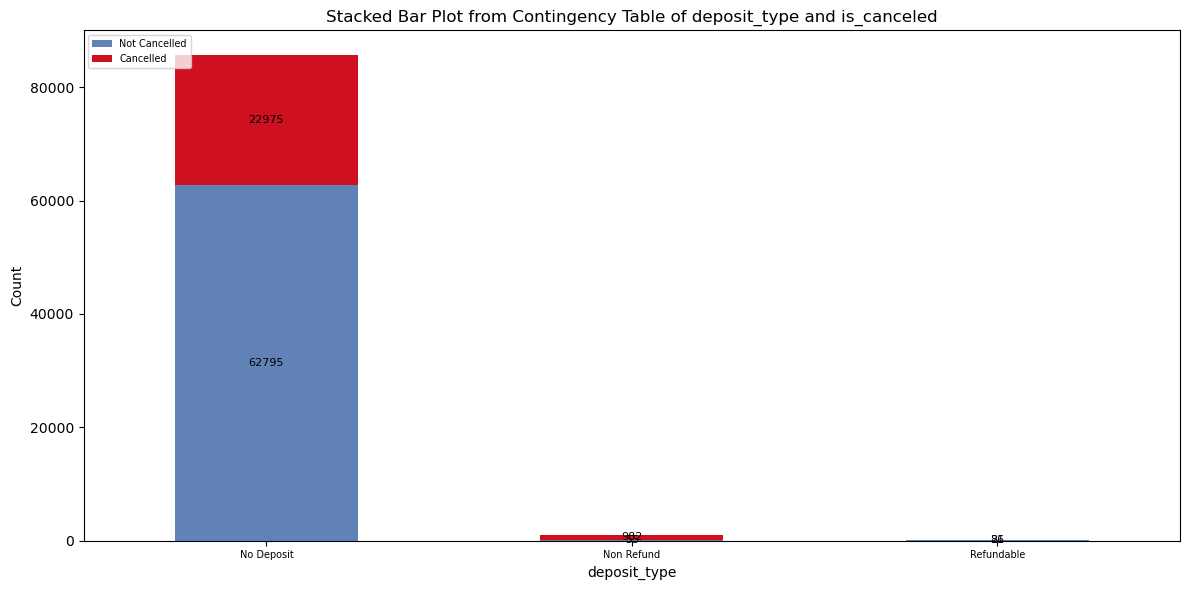

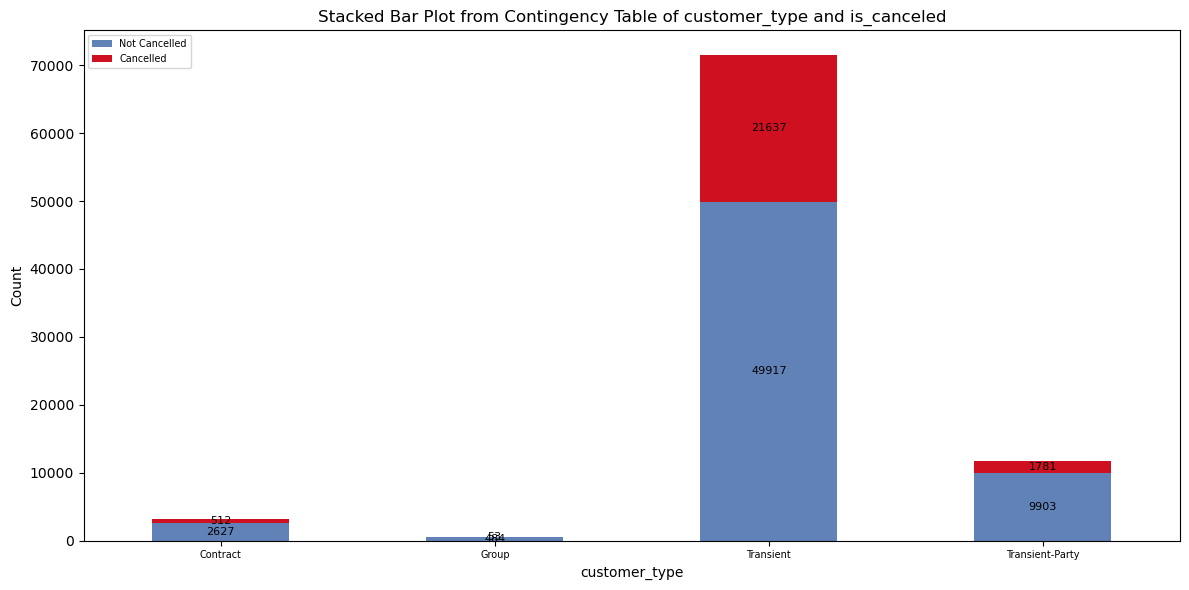

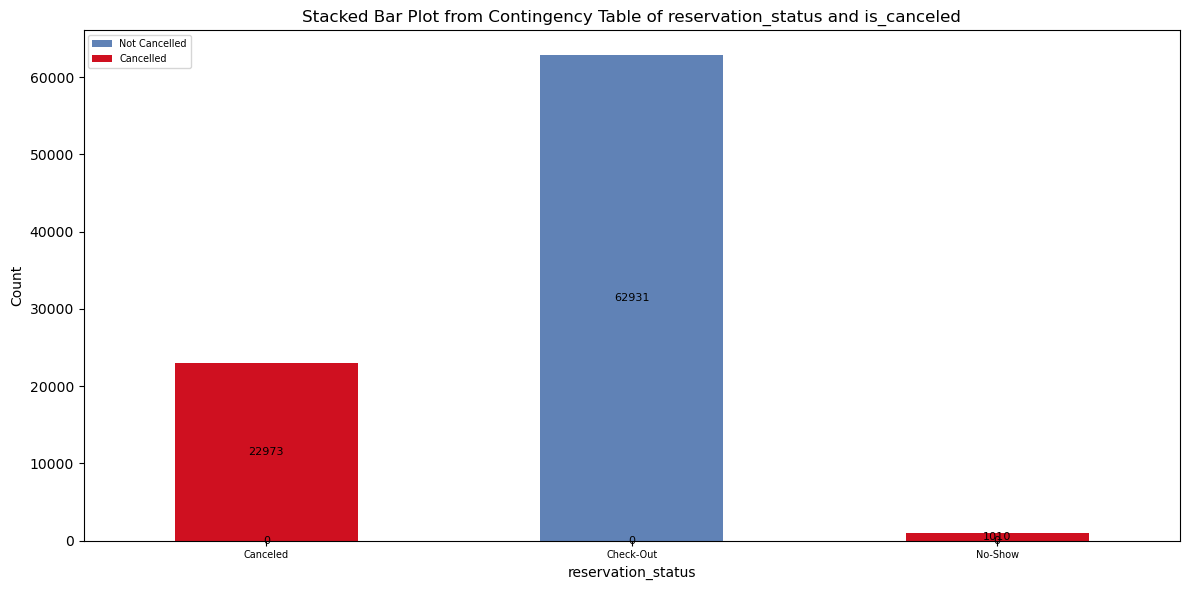

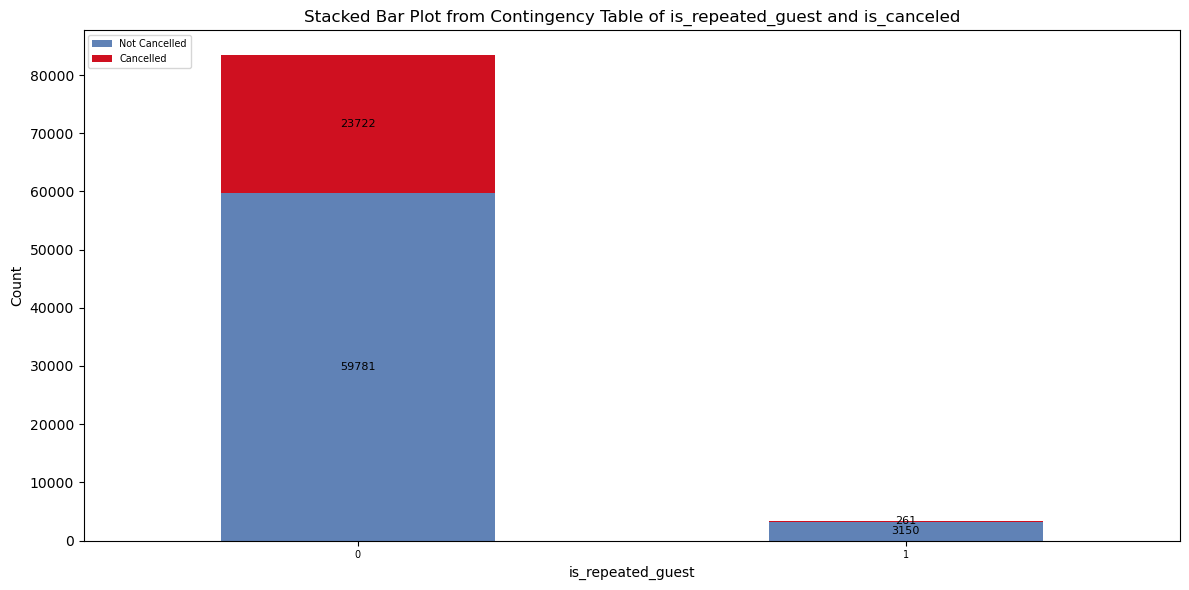

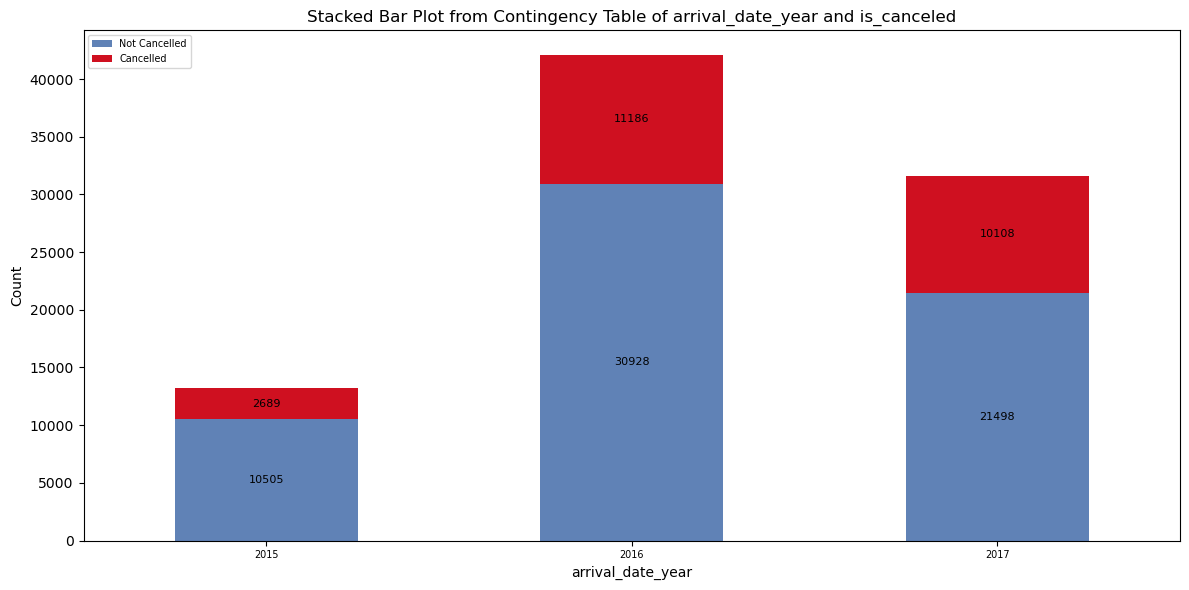

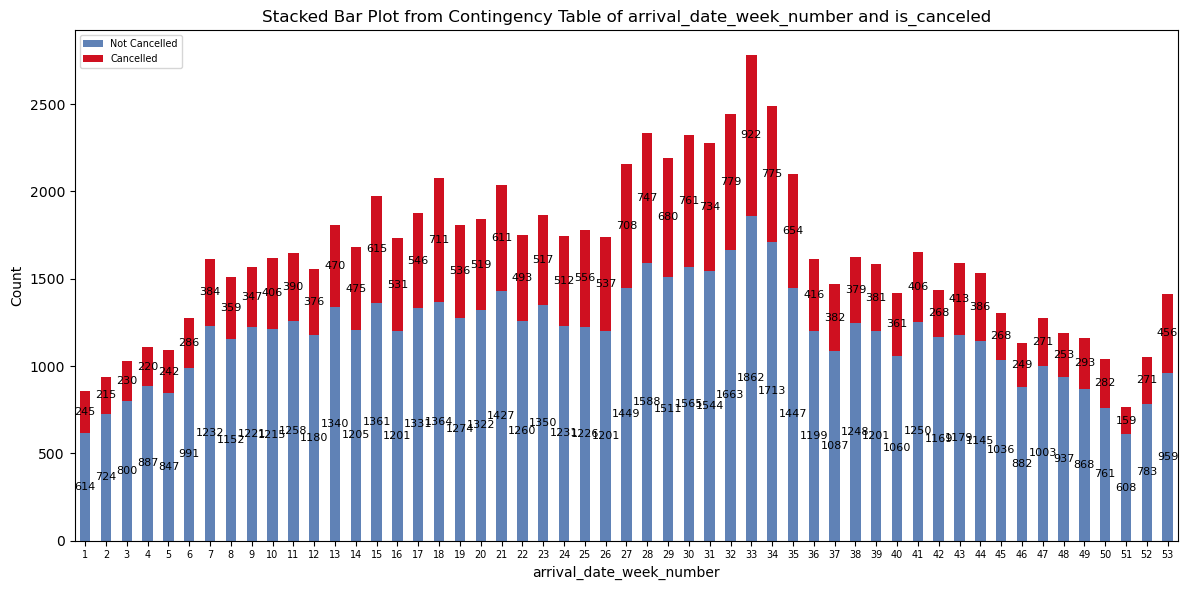

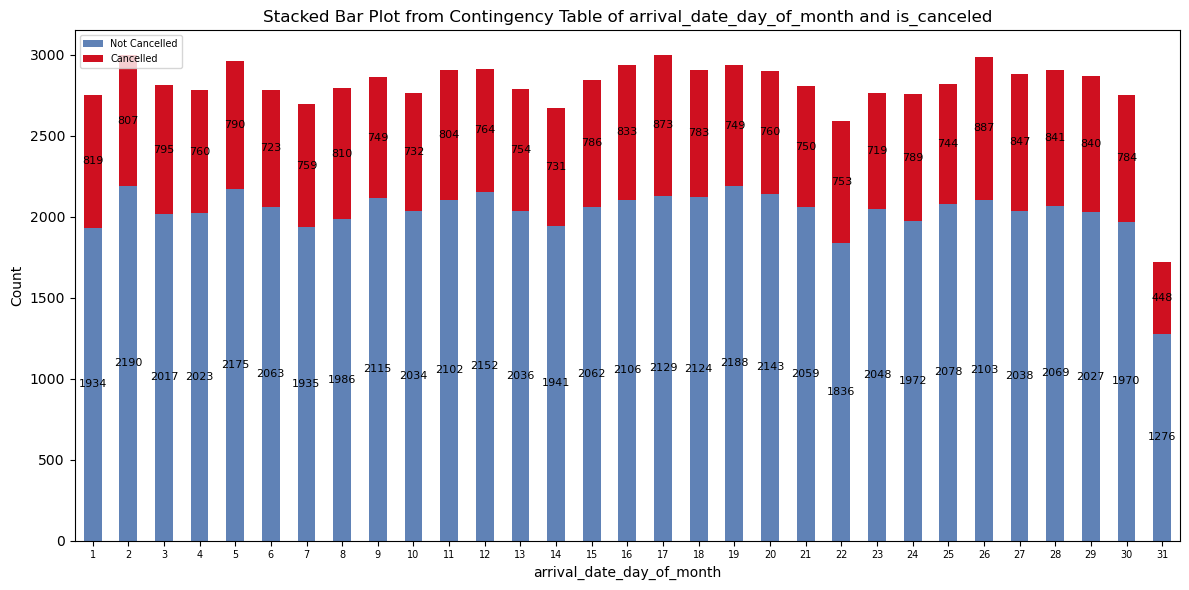

In [28]:
for column in categorical_columns:
    # Create contingency table
    contingency_table = pd.crosstab(df[column], df['is_canceled'])

    # Plot stacked bar plot with custom colors
    colors = ['#6082b6', '#cf1020']
    ax = contingency_table.plot(kind='bar', stacked=True, figsize=(12, 6), color=colors)

    # Set labels and title
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f'Stacked Bar Plot from Contingency Table of {column} and is_canceled')
    plt.xticks(rotation=360, fontsize=7)

    # Add custom legend
    plt.legend(['Not Cancelled', 'Cancelled'], loc='upper left', fontsize='x-small', ncol=1)

    # Add labels to the bars
    for c in ax.containers:
        ax.bar_label(c, label_type='center', size=8)

    plt.tight_layout()
    plt.show()

### Check the numerical variables

In [29]:
numerical_columns = [col for col in df.select_dtypes(exclude=['object']).columns 
                     if col not in ['arrival_date_year', 'is_repeated_guest', 'reservation_status_date','arrival_date_week_number', 'arrival_date_day_of_month']]
len(numerical_columns)

14

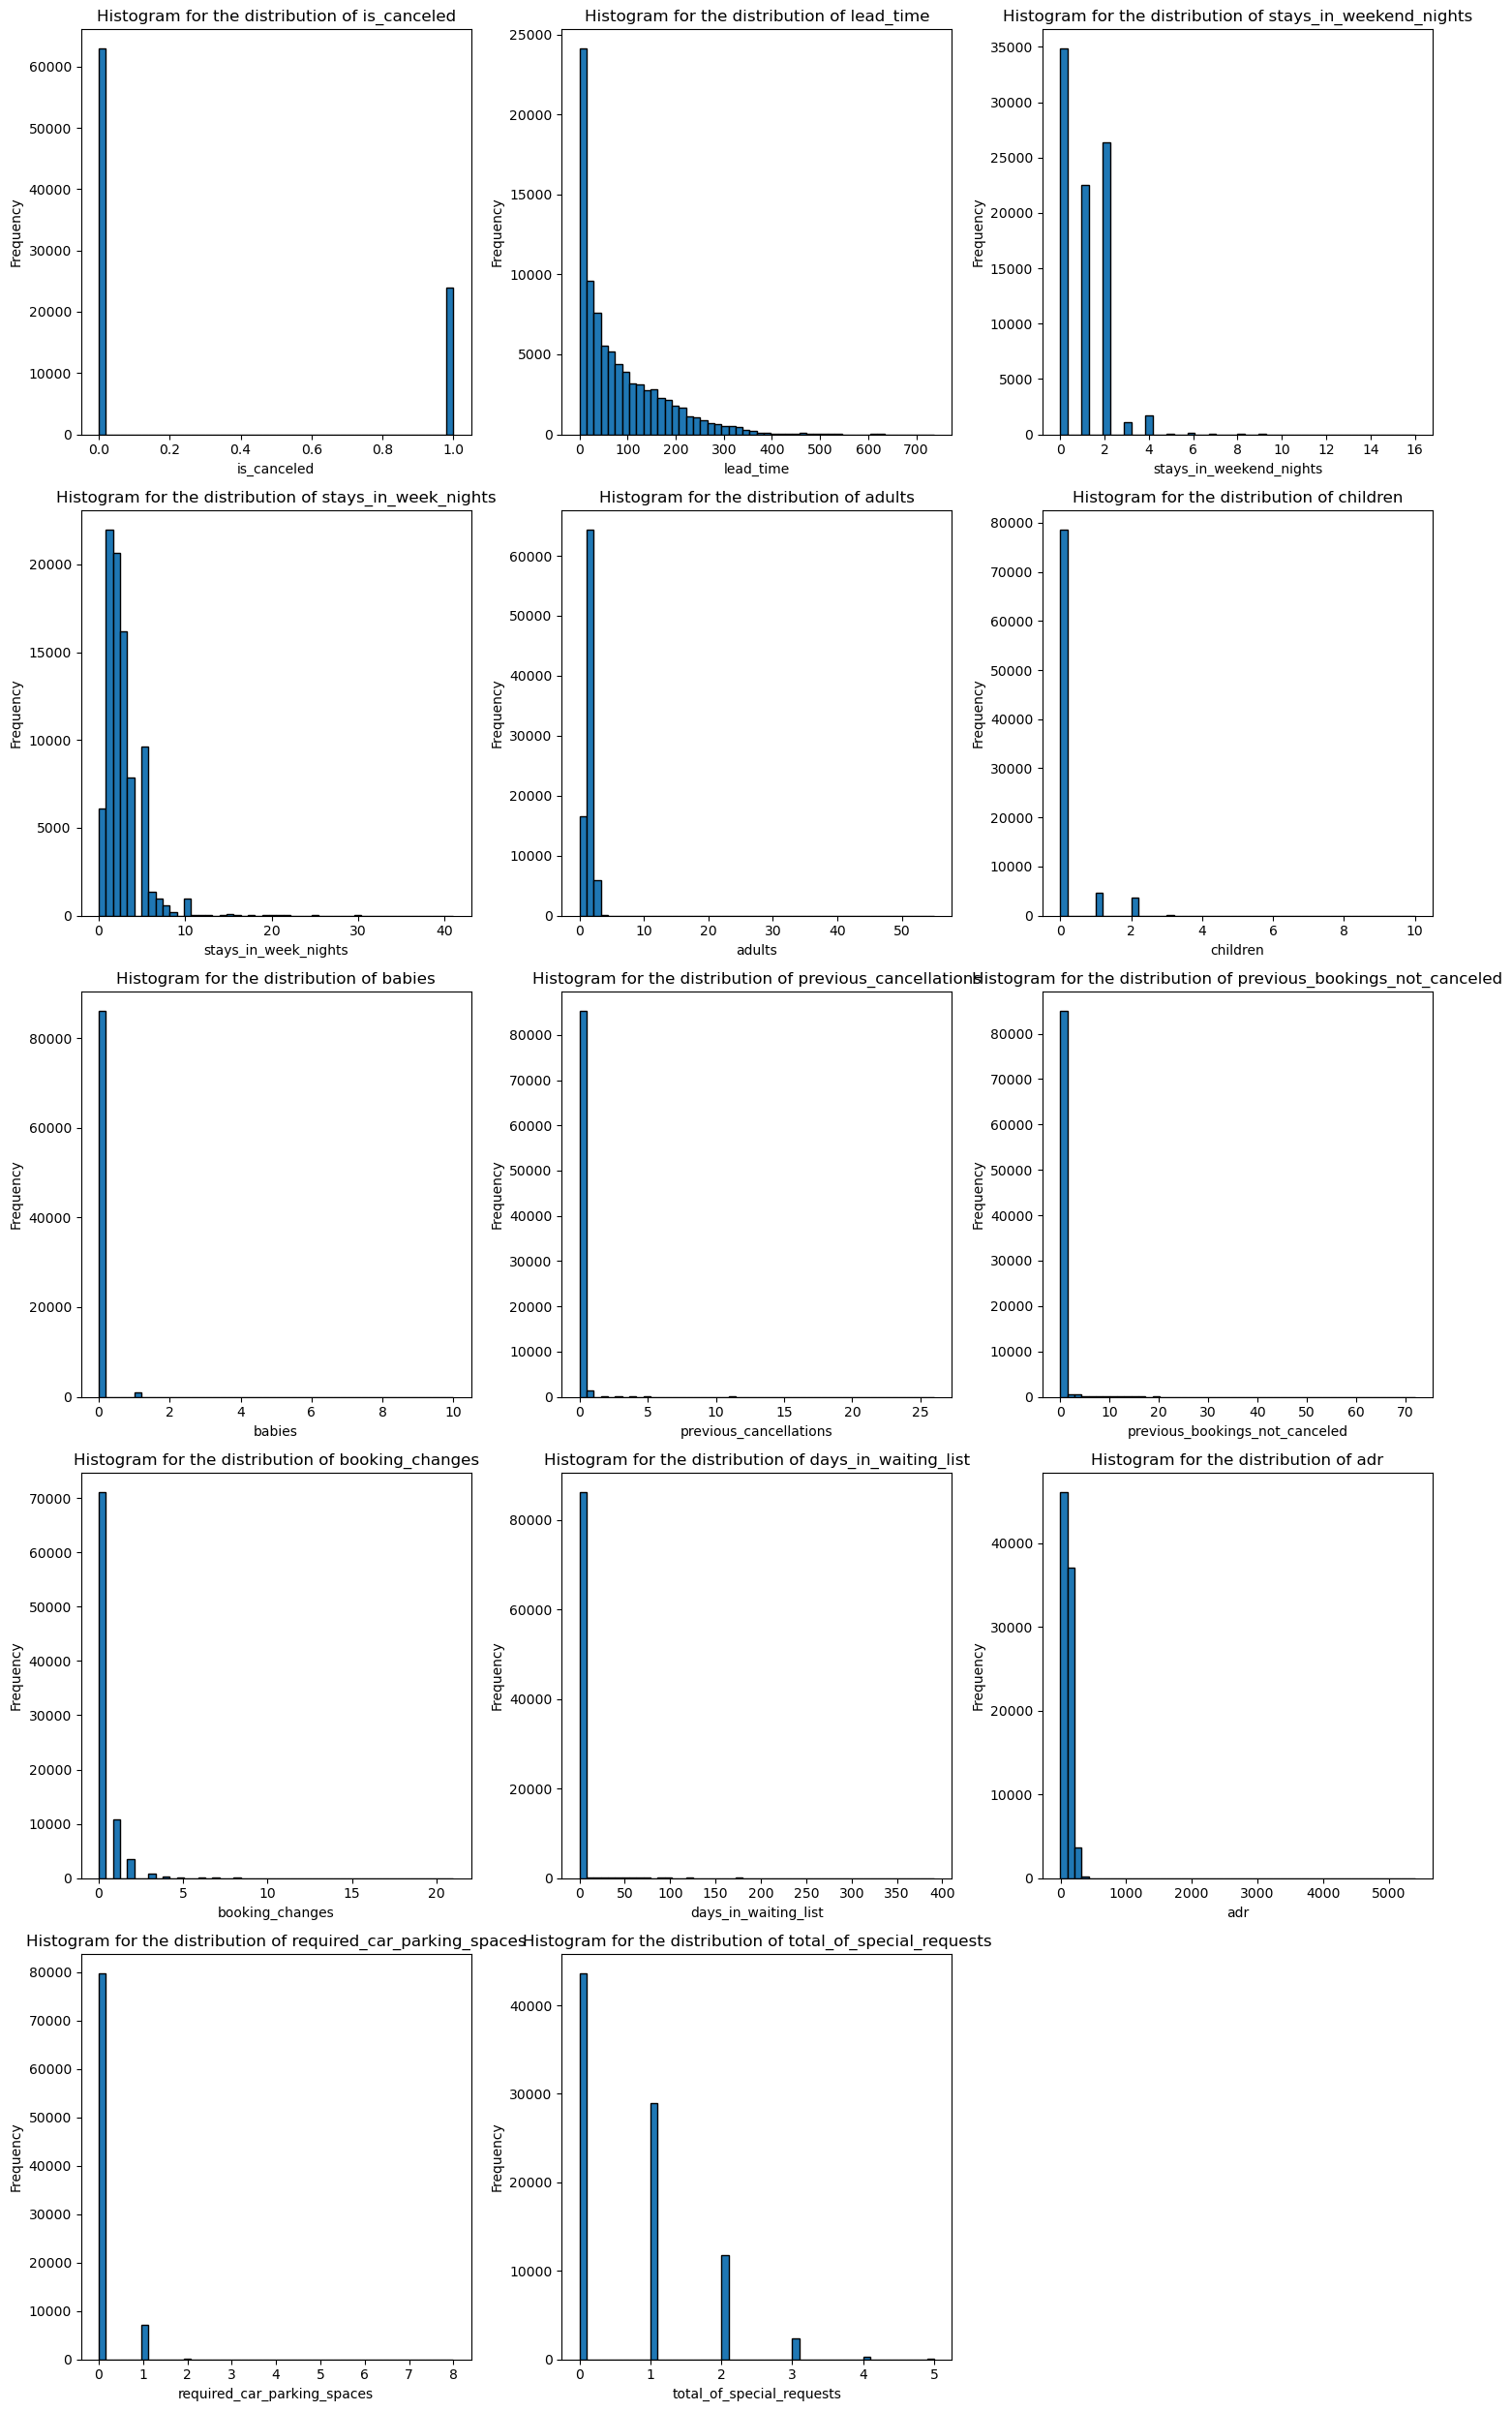

In [30]:
num_columns = len(numerical_columns)
num_rows = (num_columns + 2) // 3
num_cols = min(3, num_columns)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Flatten axes if necessary
if num_rows == 1:
    axes = [axes]

for i, column in enumerate(numerical_columns):
    row_idx = i // num_cols
    col_idx = i % num_cols
    ax = axes[row_idx][col_idx]

    ax.hist(df[column], bins=50, edgecolor='k')
    ax.set_title(f'Histogram for the distribution of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

# Remove any extra empty subplots
for j in range(num_columns, num_rows * num_cols):
    fig.delaxes(axes.flatten()[j])

fig.tight_layout()
plt.show()

### Check Average Daily Rate by hotel and time

ADR stands for Average Daily Rate. It is a key performance metric used in the hotel industry to measure the average revenue earned per occupied room in a given time period. ADR is calculated by dividing the total room revenue by the number of rooms sold (occupied) during that period.

Mathematically, ADR is represented as:

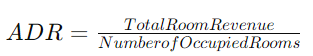
 

ADR is important because it provides hotel managers with insights into the pricing strategy and overall performance of their property. By tracking ADR over time, hotels can assess their revenue management strategies, adjust room rates accordingly, and maximize profitability. Additionally, ADR is often used in conjunction with other metrics like occupancy rate and RevPAR (Revenue per Available Room) to evaluate a hotel's financial performance and make informed business decisions.

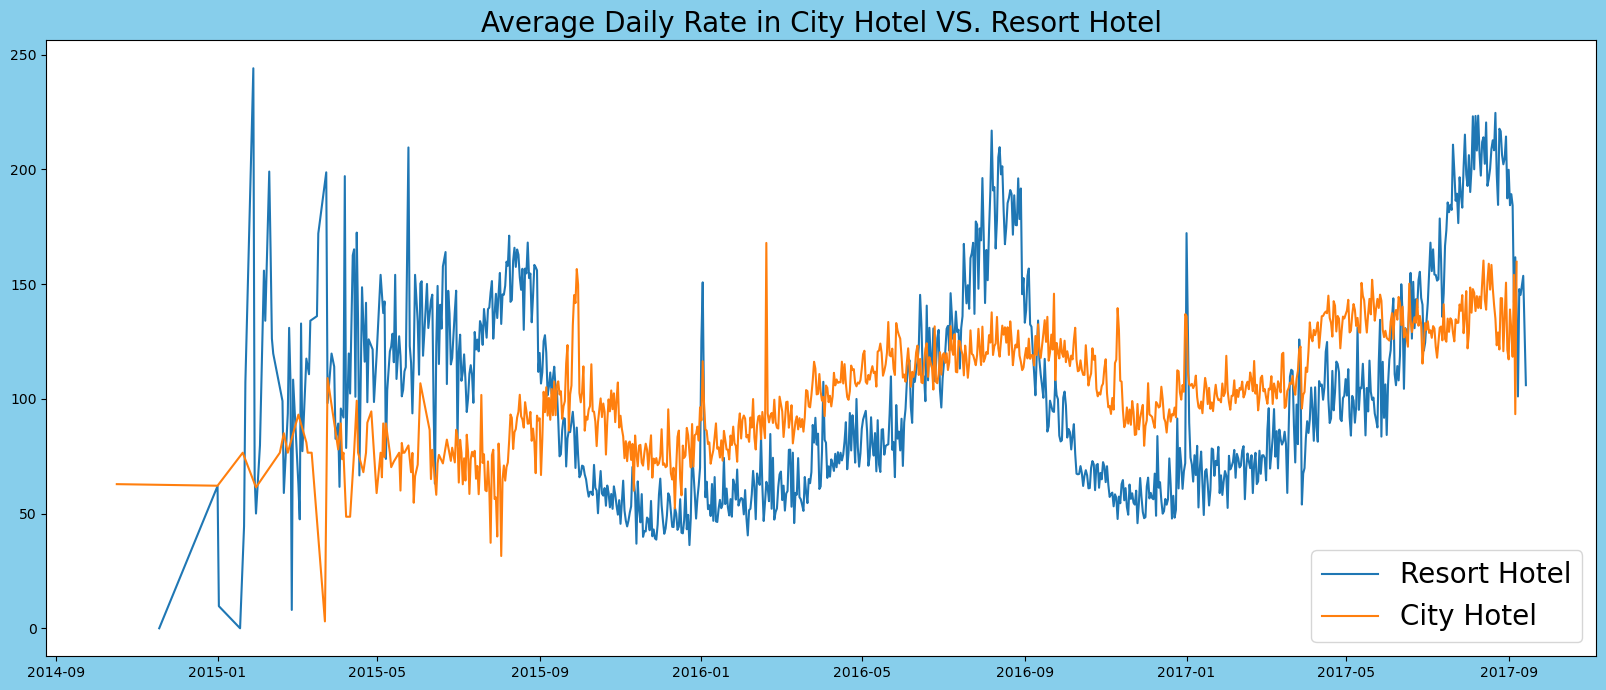

In [31]:
# Filter data by hotel type
resort_hotel = df[df['hotel'] == 'Resort Hotel'].groupby('reservation_status_date')['adr'].mean()
city_hotel = df[df['hotel'] == 'City Hotel'].groupby('reservation_status_date')['adr'].mean()

# Plotting
plt.figure(figsize=(20, 8), facecolor='#87ceeb')
plt.title('Average Daily Rate in City Hotel VS. Resort Hotel', fontsize=20)
plt.plot(resort_hotel.index, resort_hotel, label='Resort Hotel')
plt.plot(city_hotel.index, city_hotel, label='City Hotel')
plt.legend(fontsize=20)
plt.show()

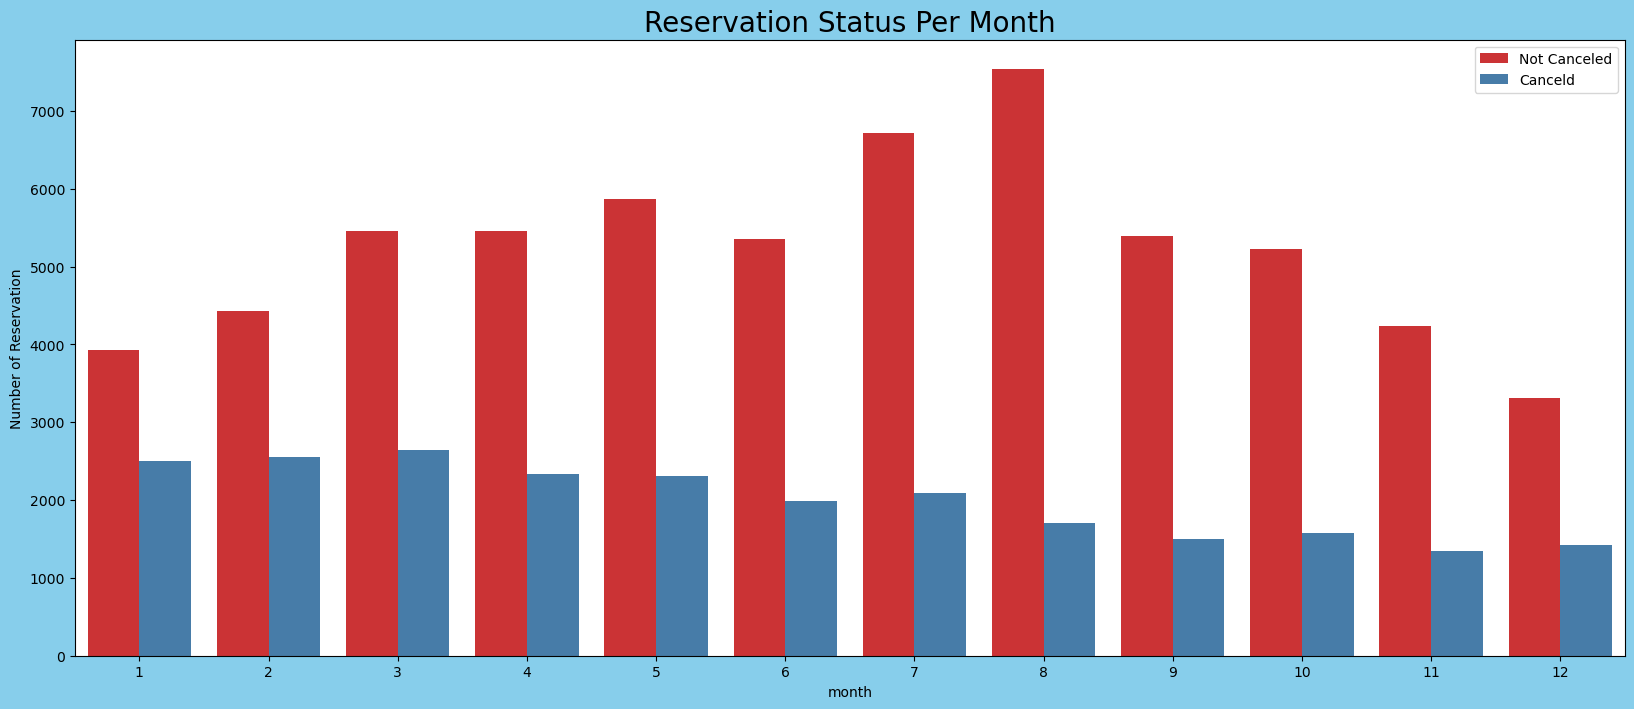

In [32]:
df['month']=df['reservation_status_date'].dt.month
plt.figure(figsize=(20,8), facecolor='#87ceeb')
ax1 = sns.countplot(x='month', hue='is_canceled', data= df, palette = 'Set1')
legend_lebels,_ = ax1.get_legend_handles_labels()
plt.title('Reservation Status Per Month', size = 20)
plt.xlabel('month')
plt.ylabel('Number of Reservation')
plt.legend(['Not Canceled','Canceld'])
plt.show()

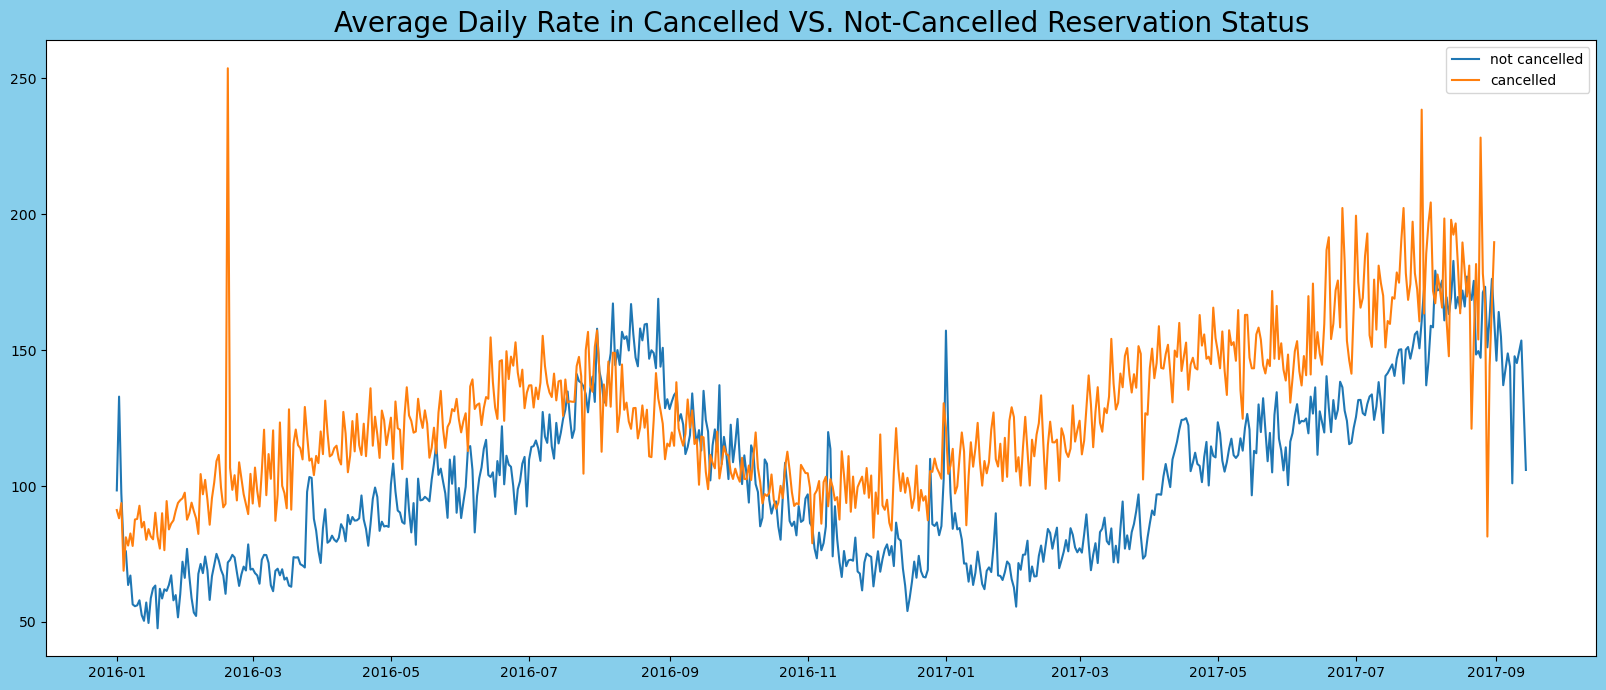

In [33]:
# Filter data starting from 'reservation_status_date' equal to or after '2016-01-01'
df_filtered = df[df['reservation_status_date'] >= '2016-01-01']

# Group and calculate mean ADR for canceled and not-canceled reservations separately
cancelled_df_adr = df_filtered[df_filtered['is_canceled'] == 1].groupby('reservation_status_date')[['adr']].mean()
not_cancelled_df_adr = df_filtered[df_filtered['is_canceled'] == 0].groupby('reservation_status_date')[['adr']].mean()

# Reset index and sort for both DataFrames
cancelled_df_adr.reset_index(inplace=True)
cancelled_df_adr.sort_values('reservation_status_date', inplace=True)
not_cancelled_df_adr.reset_index(inplace=True)
not_cancelled_df_adr.sort_values('reservation_status_date', inplace=True)

# Plotting
plt.figure(figsize=(20, 8), facecolor='#87ceeb')
plt.title('Average Daily Rate in Cancelled VS. Not-Cancelled Reservation Status', color="Black", fontsize=20)
plt.plot(not_cancelled_df_adr['reservation_status_date'], not_cancelled_df_adr['adr'], label='not cancelled')
plt.plot(cancelled_df_adr['reservation_status_date'], cancelled_df_adr['adr'], label='cancelled')
plt.legend()
plt.show()

### Preliminary Conclusion from Data Visualization

* 1. The bar plot depicting Cancellation Status in 4.1.1 reveals a cancellation rate of 37.14%, potentially impeding revenue growth.There is a notable difference between cancelled and not cancelled reservations.
* 2. The City Hotel has more booking with higher cancellation rate.
* 3. The PRT country has largest reservations but having the highest cancellation, even the cancellation exceeded the non cancellation.
* 4. The cancellation rate is lower from November to February than in other months.
* 5. The cancellation rate is higher for Online TA, Offline TA/TO and groups based on Market segment designation.
* 6. The cancellation rate is higher for TA/TO based on Booking distribution channel.
* 7. The cancellation rate is higher for room type A and D.
* 8. Most people would cancel the reservation if the deposit type is Non Refund.
* 9. Both Transient type of customers and Contract customers have higher cancellation rate. Transient type of customers has more reservations.
* 10. Most cusotmers are non repeated, and most cancellation came from new customers.
* 11. The City Hotel and Resort Hotel exhibit similar trends of increase and decrease for ADR during the same time periods. Both experienced a decline from September 2015, followed by an uptrend from the start of 2016 until September of the same year. Subsequently, there was a downturn until the beginning of 2017, with another rise leading up to September. September emerges as a peak month, while January marks a trough.
* 12. Based on the cancellation from differnt month, we can see that from November to February, the cancellation is high, especially, cancellation exceeded Non cancellation in Janurary. These align with the conclusion from ADR of each hotel.
* 13. The ADR is higher for cancelled reservation compared to non cancelled reservation.

In [34]:
# Increasing prices are associated with a higher rate of cancellations. To mitigate reservation cancellations, hotels could refine their pricing strategies by offering reduced rates for specific locations and providing discounts to customers.
# The resort hotel experiences a higher ratio of cancellations compared to the city hotels. Therefore, hotels should consider offering competitive room price discounts on weekends and holidays.
# During the month of January, hotels can launch marketing campaigns with attractive offers to boost their revenue, especially since cancellations tend to peak during this period.
# Enhancing the quality of hotels and their services, particularly in Portugal, can be an effective approach.

# Model Training

Factors influencing hotel reservation cancellations

## Feature Selection

In [35]:
from scipy.stats import chi2_contingency
significant_features = []

for column in categorical_columns:
    contingency_table = pd.crosstab(df[column], df['is_canceled'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    if p < 0.05:
        significant_features.append(column)

print("Significant features selected using Chi-Square:", significant_features)

Significant features selected using Chi-Square: ['hotel', 'arrival_date_month', 'meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'is_repeated_guest', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month']


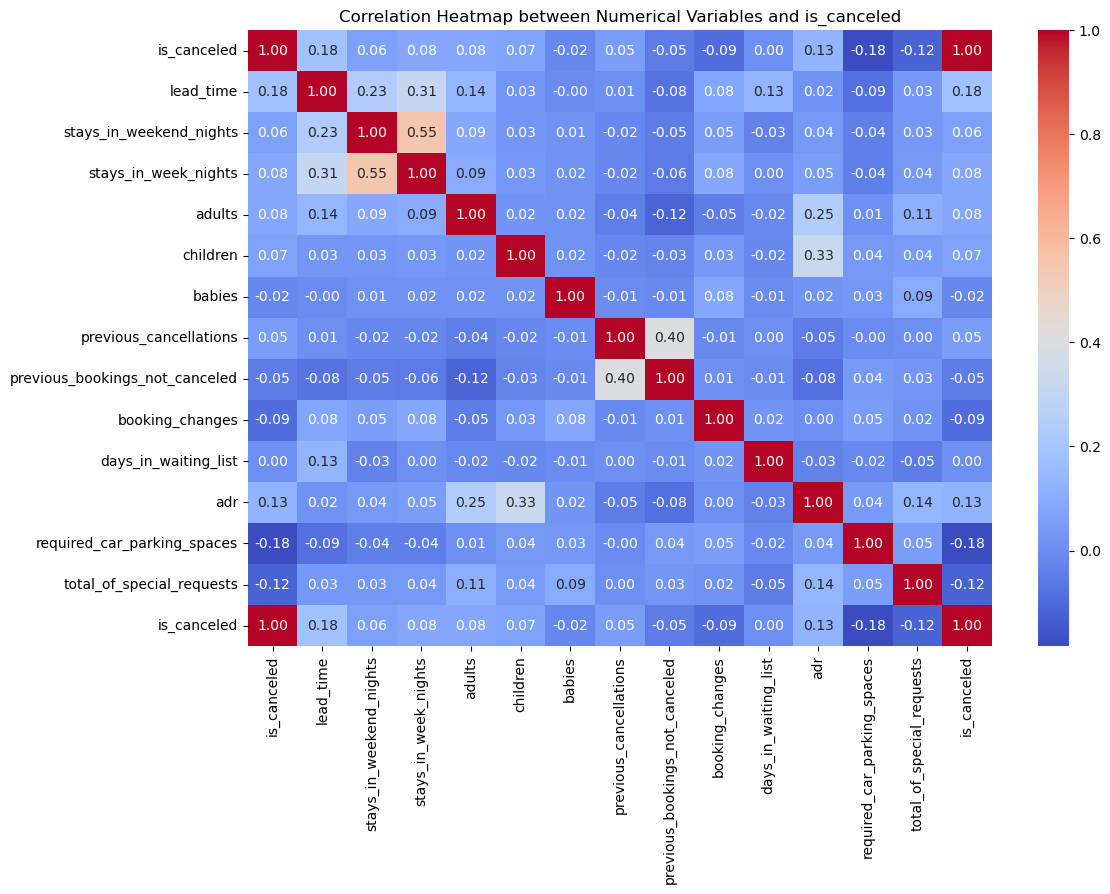

In [36]:
# Compute correlation coefficients
correlation_matrix = df[numerical_columns + ['is_canceled']].corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap between Numerical Variables and is_canceled")
plt.show()

In [37]:
from scipy.stats import ttest_ind

significant_numerical_variables = []

for column in numerical_columns:
    canceled = df[df['is_canceled'] == 1][column]
    not_canceled = df[df['is_canceled'] == 0][column]
    t_statistic, p_value = ttest_ind(canceled, not_canceled)
    if p_value < 0.05:
        significant_numerical_variables.append(column)

print("Numerical variables with significant influence on 'is_canceled':", significant_numerical_variables)

Numerical variables with significant influence on 'is_canceled': ['is_canceled', 'lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']


In [38]:
X = df.drop(['is_canceled','reservation_status','reservation_status_date','country_new','month'], axis=1)
y = df['is_canceled']

## Dummy categorical variables

In [39]:
X=pd.get_dummies(X,dtype=float,drop_first=True)

In [40]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.2 , random_state=42)

Training RandomForest...
Evaluating RandomForest...
Accuracy for RandomForest: 0.8441580854858195
F1 Score for RandomForest: 0.687001733102253
Classification Report for RandomForest:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90     12626
           1       0.76      0.62      0.69      4757

    accuracy                           0.84     17383
   macro avg       0.82      0.78      0.79     17383
weighted avg       0.84      0.84      0.84     17383



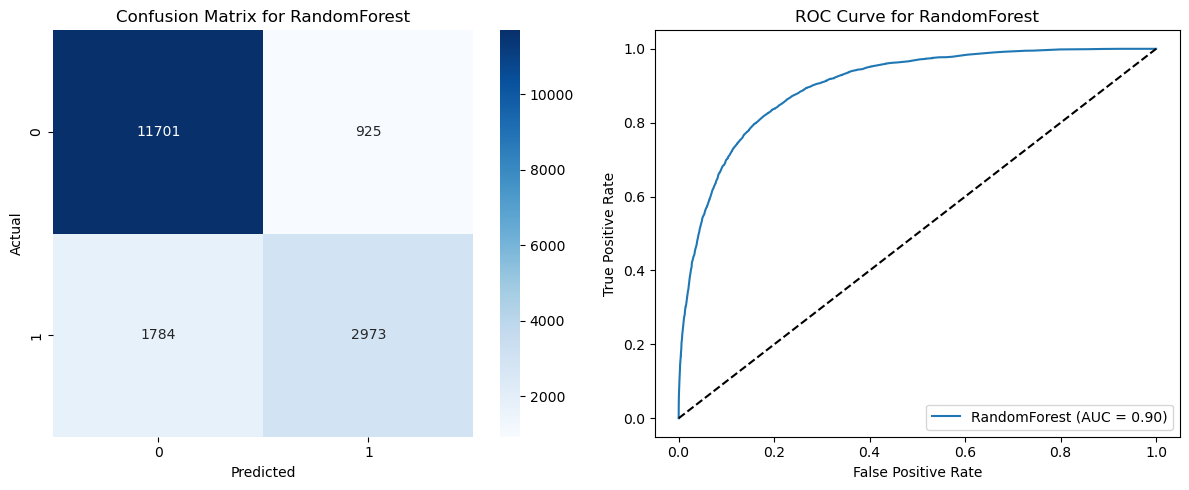

Training DecisionTree...
Evaluating DecisionTree...
Accuracy for DecisionTree: 0.7889892423632284
F1 Score for DecisionTree: 0.5712949976624591
Classification Report for DecisionTree:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86     12626
           1       0.64      0.51      0.57      4757

    accuracy                           0.79     17383
   macro avg       0.74      0.70      0.72     17383
weighted avg       0.78      0.79      0.78     17383



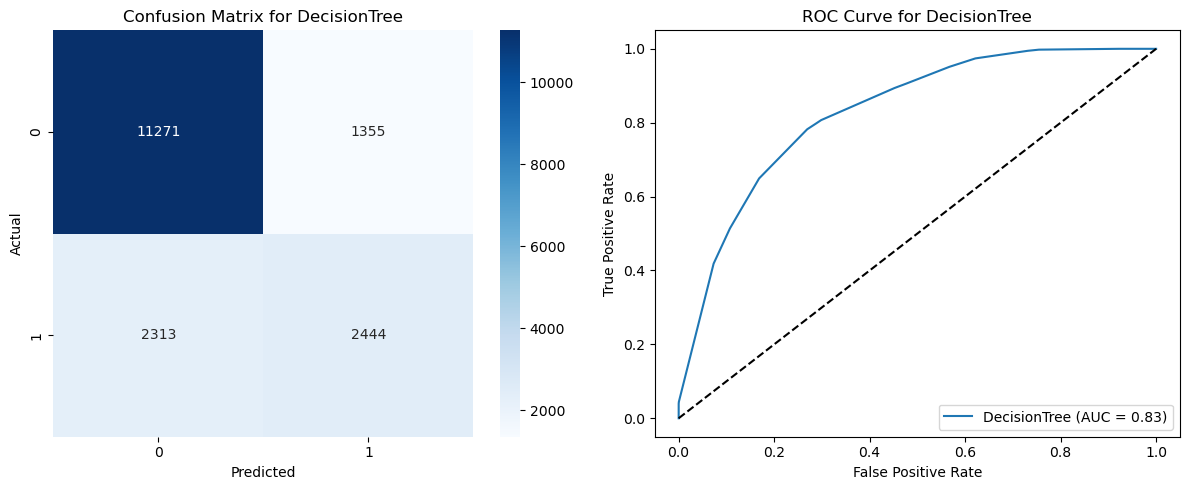

Training AdaBoost...
Evaluating AdaBoost...
Accuracy for AdaBoost: 0.757349134211586
F1 Score for AdaBoost: 0.3037306041597887
Classification Report for AdaBoost:
              precision    recall  f1-score   support

           0       0.76      0.97      0.85     12626
           1       0.71      0.19      0.30      4757

    accuracy                           0.76     17383
   macro avg       0.73      0.58      0.58     17383
weighted avg       0.75      0.76      0.70     17383



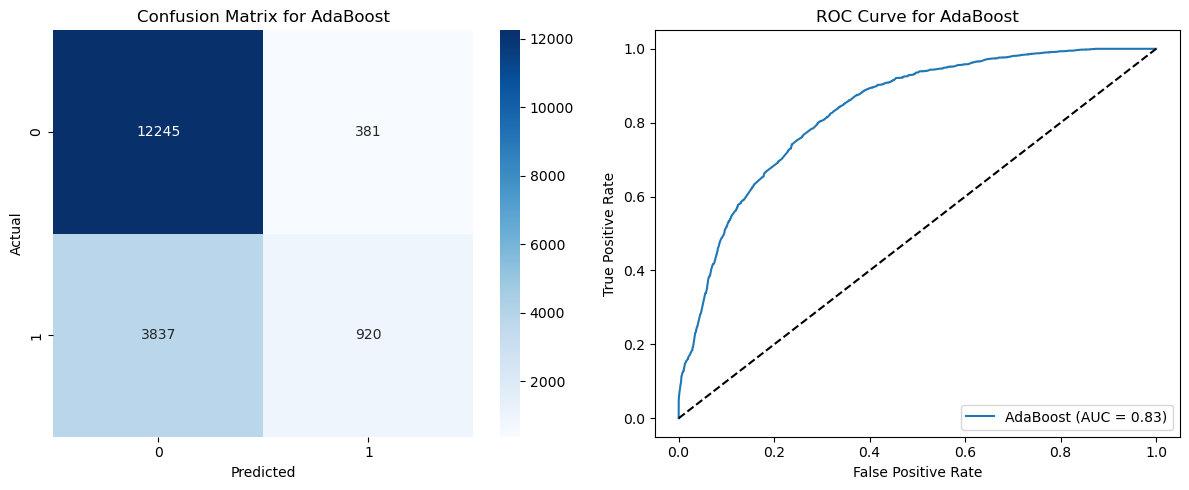

Training LightGBM...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 19226, number of negative: 50305
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.024162 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1056
[LightGBM] [Info] Number of data points in the train set: 69531, number of used features: 130
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.276510 -> initscore=-0.961841
[LightGBM] [Info] Start training from score -0.961841
Evaluating LightGBM...
Accuracy for LightGBM: 0.8365644595294253
F1 Score for LightGBM: 0.6820369334079462
Classification Report for LightGBM:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89     12626
           1       0.73      0.64      0.68      4757

    accuracy                           0.84     17383
   macro avg       0.80      0.78      0.79

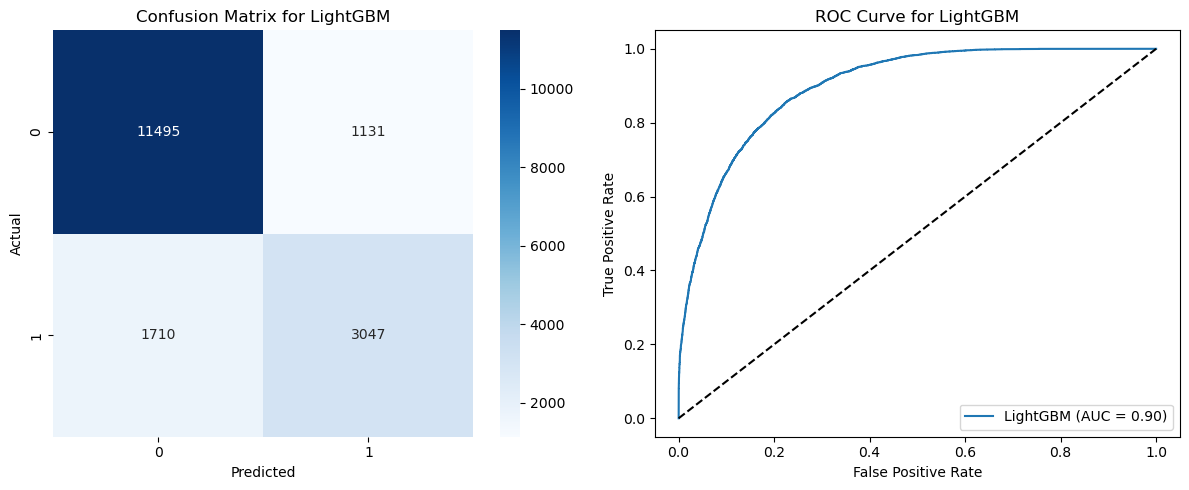

In [41]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgb
from sklearn.metrics import f1_score, accuracy_score, classification_report, confusion_matrix, roc_curve, auc

def binary_classification(X_train, X_test, y_train, y_test):
    # Define classifiers
    classifiers = {
        'RandomForest': RandomForestClassifier(n_estimators=200),
        'DecisionTree': DecisionTreeClassifier(max_depth=5),
        'AdaBoost': AdaBoostClassifier(n_estimators=100, learning_rate=0.1),
        'LightGBM': lgb.LGBMClassifier(num_leaves=30, learning_rate=0.1)
    }

    # Evaluate models
    for name, clf in classifiers.items():
        print(f"Training {name}...")
        clf.fit(X_train, y_train)
        print(f"Evaluating {name}...")
        y_pred = clf.predict(X_test)
        f1 = f1_score(y_test, y_pred)
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred)
        
        # ROC Curve and AUC
        y_pred_prob = clf.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
        roc_auc = auc(fpr, tpr)
        
        # Print results
        print(f"Accuracy for {name}: {accuracy}")
        print(f"F1 Score for {name}: {f1}")
        print(f"Classification Report for {name}:\n{report}")
        
        # Plot Confusion Matrix and ROC Curve in the same row
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))
        
        # Confusion Matrix
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=axes[0])
        axes[0].set_title(f'Confusion Matrix for {name}')
        axes[0].set_xlabel('Predicted')
        axes[0].set_ylabel('Actual')
        
        # ROC Curve
        axes[1].plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
        axes[1].plot([0, 1], [0, 1], 'k--')
        axes[1].set_xlabel('False Positive Rate')
        axes[1].set_ylabel('True Positive Rate')
        axes[1].set_title(f'ROC Curve for {name}')
        axes[1].legend(loc='lower right')
        
        plt.tight_layout()
        plt.show()

binary_classification(X_train, X_test, y_train, y_test)

# Model Evaluation

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 19226, number of negative: 50305
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008143 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1056
[LightGBM] [Info] Number of data points in the train set: 69531, number of used features: 130
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.276510 -> initscore=-0.961841
[LightGBM] [Info] Start training from score -0.961841
Accuracy for LightGBM: 0.8365644595294253


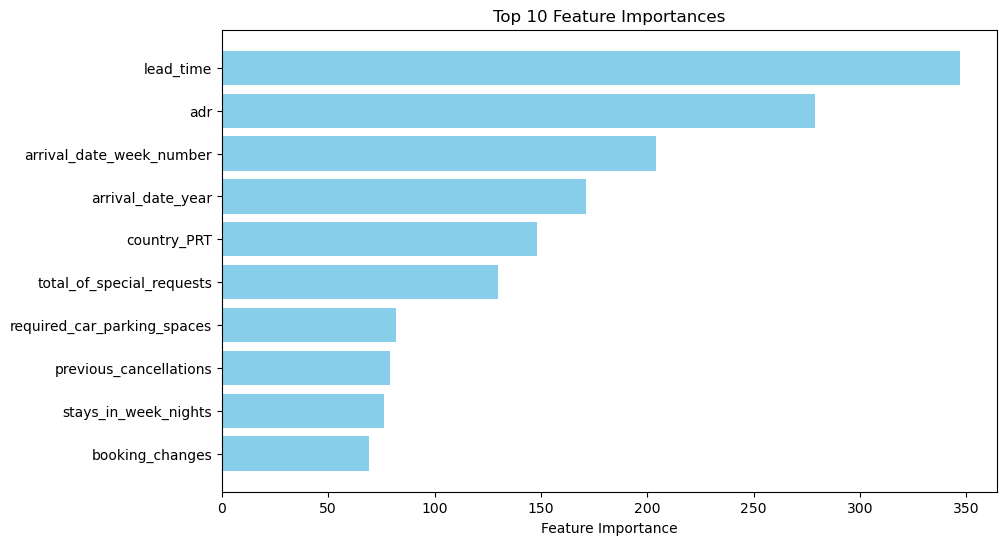

In [42]:
def plot_feature_importance(model, X_train, top_n=10):
    # Get feature importances
    feature_importances = model.feature_importances_
    
    # Create a DataFrame for feature importances
    feature_importances_df = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': feature_importances
    })
    
    # Sort the DataFrame by importance
    feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False).head(top_n)
    
    # Plot the top n features
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'], color='skyblue')
    plt.xlabel('Feature Importance')
    plt.title(f'Top {top_n} Feature Importances')
    plt.gca().invert_yaxis()
    plt.show()

# Train and get feature importance from LightGBM model
def get_lightgbm_feature_importance(X_train, X_test, y_train, y_test):
    model = lgb.LGBMClassifier(num_leaves=30, learning_rate=0.1)
    model.fit(X_train, y_train)
    
    # Evaluate the model
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for LightGBM: {accuracy}")
    
    # Plot top 10 feature importances
    plot_feature_importance(model, X_train, top_n=10)

# Assuming X_train, X_test, y_train, y_test are already defined
get_lightgbm_feature_importance(X_train, X_test, y_train, y_test)

# Conclusion

1. **Lead Time**: The most important metric is lead time, which is the difference between the booking entry date and the guest's arrival date in days. This metric helps identify how far in advance reservations are made relative to the planned arrival. For instance, if most bookings are made an average of 69 days in advance, a hotel might decide to run promotional campaigns a month before to attract more guests.

2. **Real-Time Dashboard Tracking**: Implement a real-time dashboard to track the Average Daily Rate (ADR). There is a higher risk of cancellations when ADR increases, so monitoring this can help manage and mitigate potential cancellations.

3. **Seasonal Patterns**: According to time-based patterns, cancellations increase from the 16th to the 35th week of each year. During this period, the hotel might consider running promotions or enforcing stricter refund policies to manage cancellations.

4. **PRT Cancellation Issues**: The PRT segment appears to have a serious cancellation problem. This issue requires in-depth research beyond data analysis to understand the underlying causes and develop effective strategies to reduce cancellations.

5. **Special Requests Impact**: More special requests, such as parking spaces, often lead to changes in reservations. Improving the handling of customer requests and addressing them promptly can reduce the likelihood of changes and cancellations.

6. **Customer Behavior Analysis**: Analyzing previous customer behaviors, such as past cancellations and reservation changes, can provide insights into the likelihood of future cancellations. Creating customer profiles based on this behavior can help identify and avoid potentially unreliable customers.